<a href="https://colab.research.google.com/github/MiguelFigueroa02/Challenge_Telecom_X_Evasion_Clientes_parte_2/blob/main/Telecom_X_Parte_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛠️ Preparación de los Datos

## Extracción del Archivo Tratado

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/MiguelFigueroa02/Challenge_Telecom_X_Evasion_Clientes_parte_2/refs/heads/main/datos_telecom_X%20parte_I.csv'
datos = pd.read_csv(url)
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Cuentas_diarias,gasto_total_mensual
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667,65.922222
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667,60.266667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333,70.212500
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667,95.219231
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667,89.133333


In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customerID           7043 non-null   object 
 1   Churn                7043 non-null   int64  
 2   gender               7043 non-null   object 
 3   SeniorCitizen        7043 non-null   int64  
 4   Partner              7043 non-null   int64  
 5   Dependents           7043 non-null   int64  
 6   tenure               7043 non-null   int64  
 7   PhoneService         7043 non-null   int64  
 8   MultipleLines        7043 non-null   int64  
 9   InternetService      7043 non-null   object 
 10  OnlineSecurity       7043 non-null   int64  
 11  OnlineBackup         7043 non-null   int64  
 12  DeviceProtection     7043 non-null   int64  
 13  TechSupport          7043 non-null   int64  
 14  StreamingTV          7043 non-null   int64  
 15  StreamingMovies      7043 non-null   i

## Eliminación de Columnas Irrelevantes

In [4]:
datos = datos.drop(columns='customerID')

In [5]:
datos.tail()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Cuentas_diarias,gasto_total_mensual
7038,0,Female,0,0,0,13,1,0,DSL,1,...,1,0,0,One year,0,Mailed check,55.15,742.90,1.838333,57.146154
7039,1,Male,0,1,0,22,1,1,Fiber optic,0,...,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.836667,85.168182
7040,0,Male,0,0,0,2,1,0,DSL,0,...,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.676667,46.375000
7041,0,Male,0,1,1,67,1,0,DSL,1,...,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.261667,69.069403
7042,0,Male,0,1,1,63,0,0,DSL,1,...,0,1,1,Two year,0,Electronic check,59.00,3707.60,1.966667,58.850794


## Encoding

In [6]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [7]:
columnas_categoricas = ['gender','InternetService', 'Contract', 'PaymentMethod']

In [8]:
one_hot_encod = make_column_transformer((OneHotEncoder(handle_unknown='ignore'), columnas_categoricas), remainder='passthrough')

datos_1 = one_hot_encod.fit_transform(datos)

In [9]:
columas_one_hot = one_hot_encod.get_feature_names_out()

In [10]:
columas_one_hot

array(['onehotencoder__gender_Female', 'onehotencoder__gender_Male',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No',
       'onehotencoder__Contract_Month-to-month',
       'onehotencoder__Contract_One year',
       'onehotencoder__Contract_Two year',
       'onehotencoder__PaymentMethod_Bank transfer (automatic)',
       'onehotencoder__PaymentMethod_Credit card (automatic)',
       'onehotencoder__PaymentMethod_Electronic check',
       'onehotencoder__PaymentMethod_Mailed check', 'remainder__Churn',
       'remainder__SeniorCitizen', 'remainder__Partner',
       'remainder__Dependents', 'remainder__tenure',
       'remainder__PhoneService', 'remainder__MultipleLines',
       'remainder__OnlineSecurity', 'remainder__OnlineBackup',
       'remainder__DeviceProtection', 'remainder__TechSupport',
       'remainder__StreamingTV', 'remainder__StreamingMovies',
       'remainder__PaperlessBilling'

In [11]:
datos = pd.DataFrame(datos_1, columns=columas_one_hot)

In [12]:
datos.head()

,onehotencoder__gender_Female,onehotencoder__gender_Male,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),...,remainder__OnlineBackup,remainder__DeviceProtection,remainder__TechSupport,remainder__StreamingTV,remainder__StreamingMovies,remainder__PaperlessBilling,remainder__Monthly,remainder__Total,remainder__Cuentas_diarias,remainder__gasto_total_mensual
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,65.6,593.30,2.186667,65.922222
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,59.9,542.40,1.996667,60.266667
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,73.9,280.85,2.463333,70.212500
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,98.0,1237.85,3.266667,95.219231
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,83.9,267.40,2.796667,89.133333


In [13]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   onehotencoder__gender_Female                            7043 non-null   float64
 1   onehotencoder__gender_Male                              7043 non-null   float64
 2   onehotencoder__InternetService_DSL                      7043 non-null   float64
 3   onehotencoder__InternetService_Fiber optic              7043 non-null   float64
 4   onehotencoder__InternetService_No                       7043 non-null   float64
 5   onehotencoder__Contract_Month-to-month                  7043 non-null   float64
 6   onehotencoder__Contract_One year                        7043 non-null   float64
 7   onehotencoder__Contract_Two year                        7043 non-null   float64
 8   onehotencoder__PaymentMethod_Bank tran

## Verificación de la Proporción de Cancelación (Churn)


### Análisis de balanceo

In [14]:
datos['remainder__Churn'].value_counts()

,count
remainder__Churn,
0.0,5174
1.0,1869


In [15]:
(datos['remainder__Churn'].value_counts(normalize=True)*100).round(2)

,proportion
remainder__Churn,
0.0,73.46
1.0,26.54


La proporción está desbalanceada hacia los casos donde no se tiene una cancelación.

## Normalización de los datos

Se normalizan datos para la creación de modelos de regresión logística o KNN posterior


In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
datos.columns

Index(['onehotencoder__gender_Female', 'onehotencoder__gender_Male',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No',
       'onehotencoder__Contract_Month-to-month',
       'onehotencoder__Contract_One year', 'onehotencoder__Contract_Two year',
       'onehotencoder__PaymentMethod_Bank transfer (automatic)',
       'onehotencoder__PaymentMethod_Credit card (automatic)',
       'onehotencoder__PaymentMethod_Electronic check',
       'onehotencoder__PaymentMethod_Mailed check', 'remainder__Churn',
       'remainder__SeniorCitizen', 'remainder__Partner',
       'remainder__Dependents', 'remainder__tenure', 'remainder__PhoneService',
       'remainder__MultipleLines', 'remainder__OnlineSecurity',
       'remainder__OnlineBackup', 'remainder__DeviceProtection',
       'remainder__TechSupport', 'remainder__StreamingTV',
       'remainder__StreamingMovies', 'remainder__PaperlessBilling',
       'rema

In [18]:
columnas_escala = []
columnas = list(datos.columns)
for columna in columnas:
  registros = datos[columna].nunique()
  if (registros > 2):
    print(f'La columna {columna} tiene {registros} valores')
    columnas_escala.append(columna)

La columna remainder__tenure tiene 73 valores
La columna remainder__Monthly tiene 1585 valores
La columna remainder__Total tiene 6531 valores
La columna remainder__Cuentas_diarias tiene 1585 valores
La columna remainder__gasto_total_mensual tiene 6570 valores


Se evalúan las columnas con datos cuya escala pudiera llegar a impactar el desempeño de nuestro modelo.

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
import numpy as np

def ancho_bin(df, columna):
  q75, q25 = np.percentile(df[columna], [75, 25])
  iqr = q75 -q25
  ancho = 2*iqr * np.power(len(df[columna]), -1/3)
  return ancho

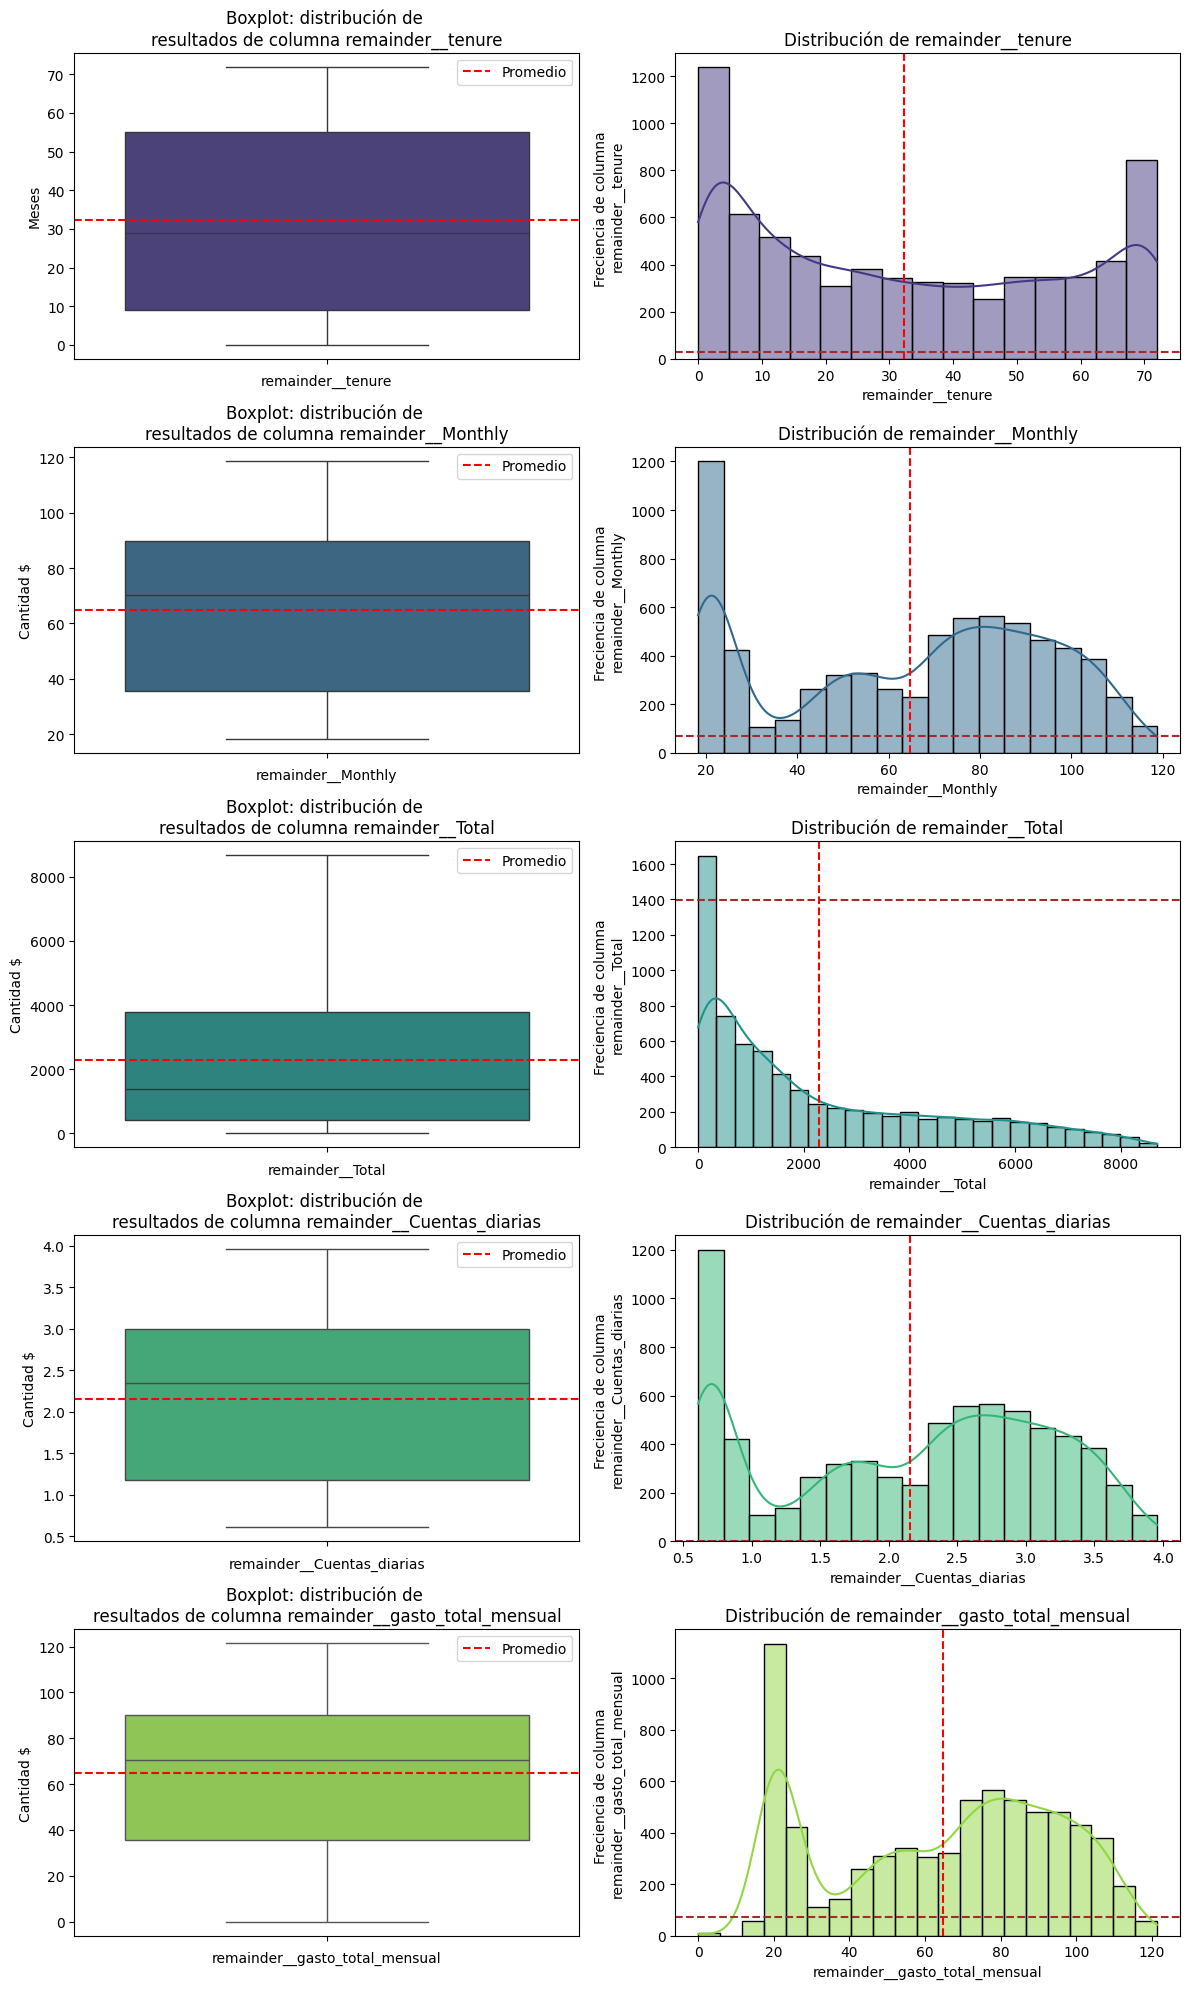

In [21]:
n_columnas = len(columnas_escala)
n_filas = 2

fig, axes = plt.subplots(n_columnas, n_filas, figsize=(12, 20))
axes = axes.flatten()

color_palette = sns.color_palette('viridis', n_columnas)

for i, columna in enumerate(columnas_escala):
  promedio = datos[columna].mean()
  mediana = datos[columna].median()
  ax_boxplot = axes[i*2]
  ax_histplot = axes[i * 2 + 1]

  sns.boxplot(data= datos, y=columna ,ax = ax_boxplot, color=color_palette[i])
  ax_boxplot.set_title(f'Boxplot: distribución de \nresultados de columna {columna}')
  ax_boxplot.set_xlabel(f'{columna}')
  ax_boxplot.set_ylabel('Meses' if columna == 'remainder__tenure' else 'Cantidad $')
  ax_boxplot.axhline(y=promedio, color= 'red', linestyle = '--', label='Promedio')
  ax_boxplot.legend()

  binwidth = ancho_bin(datos, columna)
  sns.histplot(datos[columna], kde=True , ax=ax_histplot, binwidth=binwidth, color=color_palette[i])
  ax_histplot.set_title(f'Distribución de {columna}')
  ax_histplot.set_ylabel(f'Freciencia de columna \n{columna}')
  ax_histplot.axvline(x=promedio, color= 'red', linestyle = '--', label='Promedio' )
  ax_histplot.axhline(y=mediana, color= 'brown', linestyle = '--', label='mediana')
  ax_histplot.set_xlabel(f'{columna}')

plt.tight_layout()
plt.show()

In [22]:
datos[columnas_escala].describe()

,remainder__tenure,remainder__Monthly,remainder__Total,remainder__Cuentas_diarias,remainder__gasto_total_mensual
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,2.158723,64.698218
std,24.559481,30.090047,2266.794470,1.003002,30.270670
min,0.000000,18.250000,0.000000,0.608333,0.000000
25%,9.000000,35.500000,398.550000,1.183333,35.649000
50%,29.000000,70.350000,1394.550000,2.345000,70.300000
75%,55.000000,89.850000,3786.600000,2.995000,90.174158
max,72.000000,118.750000,8684.800000,3.958333,121.400000


Dado que ninguno de los datos presenta una distribución parecida a la distribución Gaussiana, aplicaremos solamente la normalización de los datos.

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
normalizacion = MinMaxScaler()

In [25]:
columnas = datos.columns
datos_normalizados = normalizacion.fit_transform(datos)

datos_normalizados = pd.DataFrame(datos_normalizados, columns=columnas)
datos_normalizados.head()

,onehotencoder__gender_Female,onehotencoder__gender_Male,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),...,remainder__OnlineBackup,remainder__DeviceProtection,remainder__TechSupport,remainder__StreamingTV,remainder__StreamingMovies,remainder__PaperlessBilling,remainder__Monthly,remainder__Total,remainder__Cuentas_diarias,remainder__gasto_total_mensual
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.471144,0.068315,0.471144,0.543017
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.414428,0.062454,0.414428,0.496431
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.553731,0.032338,0.553731,0.578357
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,0.793532,0.142531,0.793532,0.784343
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.653234,0.030789,0.653234,0.734212


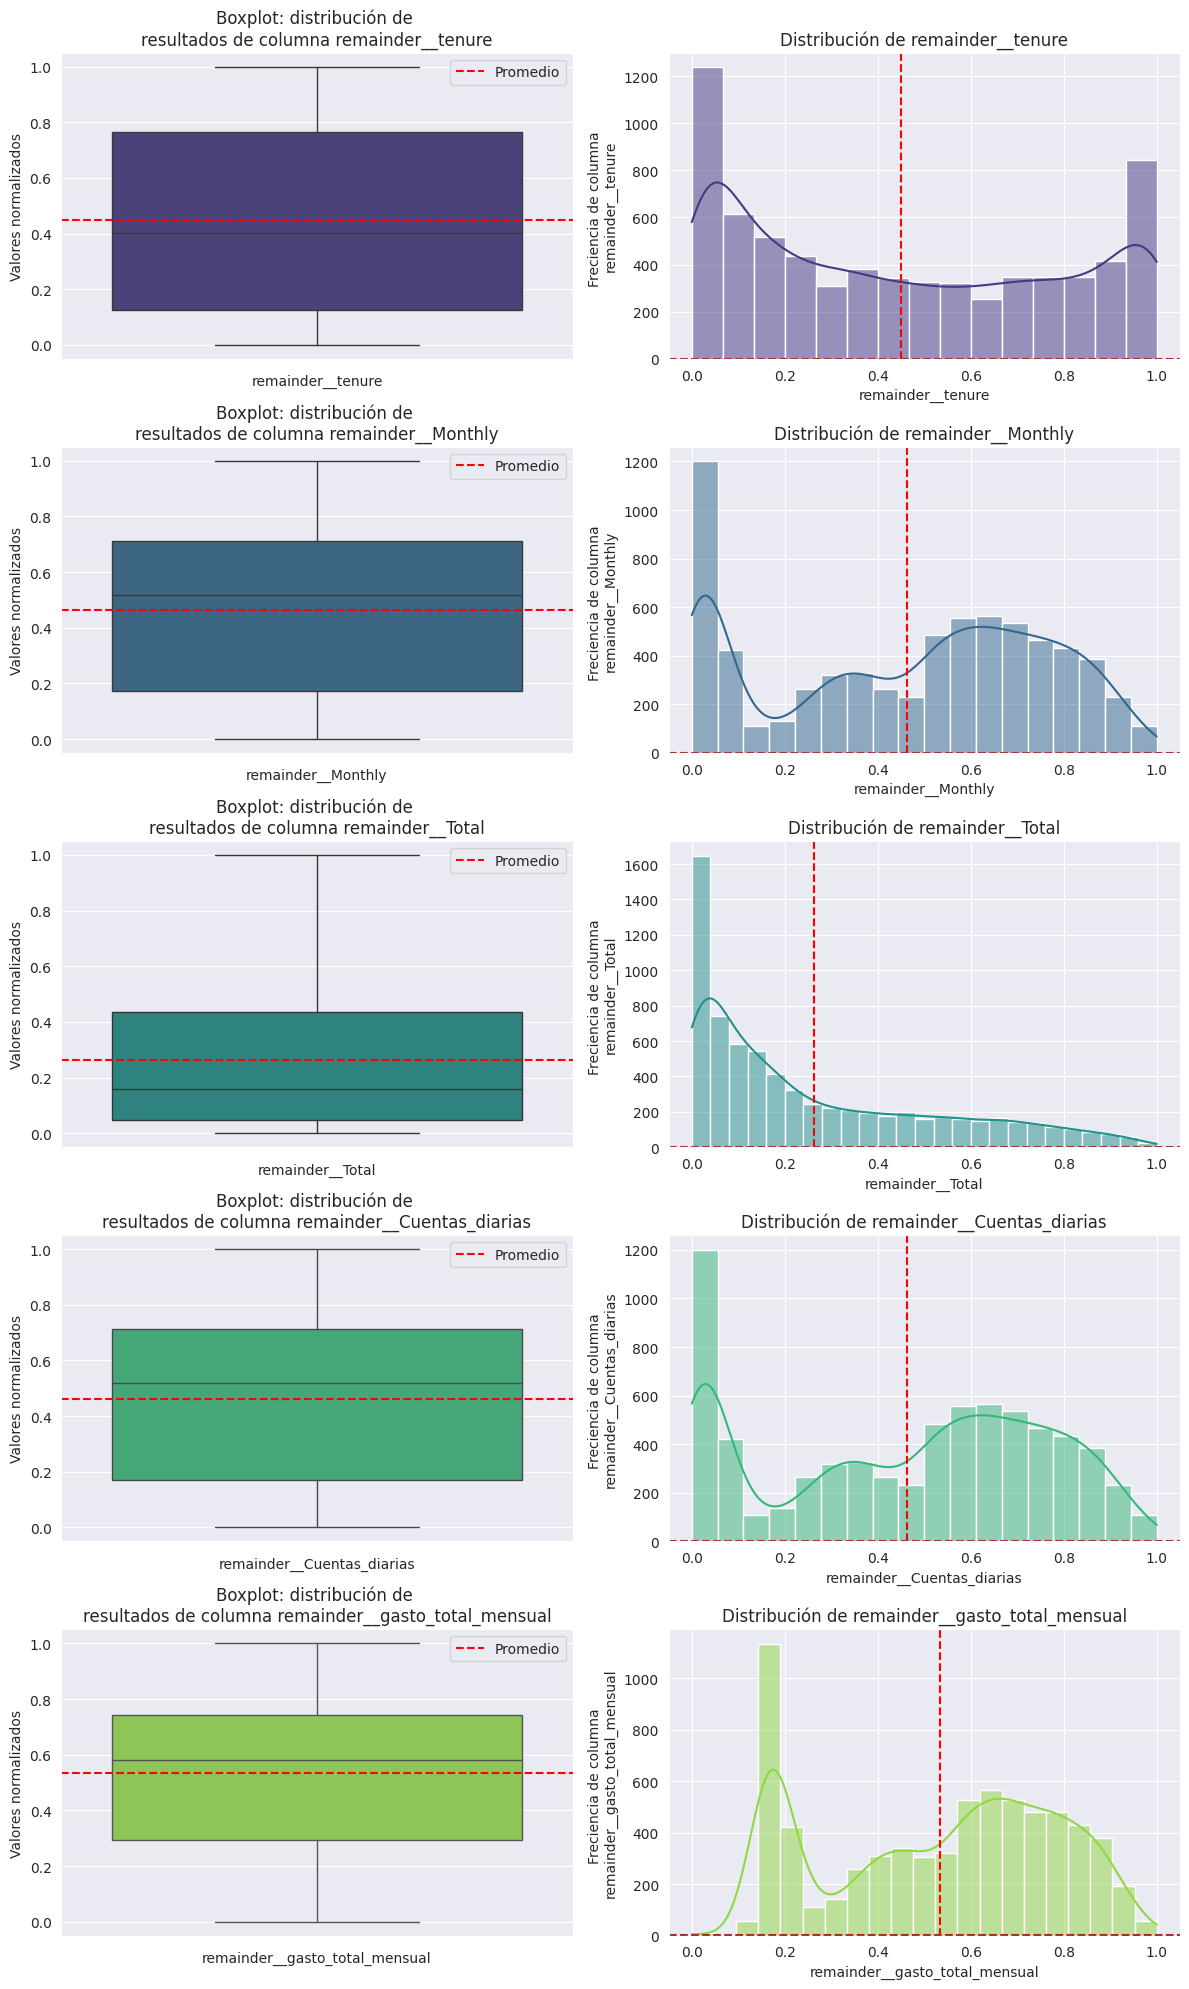

In [26]:
n_columnas = len(columnas_escala)
n_filas = 2

sns.set_style('darkgrid')
fig, axes = plt.subplots(n_columnas, n_filas, figsize=(12, 20))
axes = axes.flatten()

color_palette = sns.color_palette('viridis', n_columnas)

for i, columna in enumerate(columnas_escala):
  promedio = datos_normalizados[columna].mean()
  mediana = datos_normalizados[columna].median()
  ax_boxplot = axes[i*2]
  ax_histplot = axes[i * 2 + 1]

  sns.boxplot(data= datos_normalizados, y=columna ,ax = ax_boxplot, color=color_palette[i])
  ax_boxplot.set_title(f'Boxplot: distribución de \nresultados de columna {columna}')
  ax_boxplot.set_xlabel(f'{columna}')
  ax_boxplot.set_ylabel('Valores normalizados')
  ax_boxplot.axhline(y=promedio, color= 'red', linestyle = '--', label='Promedio')
  ax_boxplot.legend()

  binwidth = ancho_bin(datos_normalizados, columna)
  sns.histplot(datos_normalizados[columna], kde=True, ax=ax_histplot, binwidth=binwidth, color=color_palette[i])
  ax_histplot.set_title(f'Distribución de {columna}')
  ax_histplot.set_ylabel(f'Freciencia de columna \n{columna}')
  ax_histplot.axvline(x=promedio, color= 'red', linestyle = '--', label='Promedio' )
  ax_histplot.axhline(y=mediana, color= 'brown', linestyle = '--', label='mediana')
  ax_histplot.set_xlabel(f'{columna}')

plt.tight_layout()
plt.show()

In [27]:
datos_normalizados[columnas_escala].describe()

,remainder__tenure,remainder__Monthly,remainder__Total,remainder__Cuentas_diarias,remainder__gasto_total_mensual
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.449599,0.462803,0.262497,0.462803,0.532934
std,0.341104,0.299403,0.261007,0.299403,0.249347
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125000,0.171642,0.045891,0.171642,0.293649
50%,0.402778,0.518408,0.160574,0.518408,0.579077
75%,0.763889,0.712438,0.436003,0.712438,0.742785
max,1.000000,1.000000,1.000000,1.000000,1.000000


Se verifica que no haya impacto de la normalización en la distribución de los resultados.

# 🎯 Correlación y Selección de Variables

## Análisis de Correlación

In [28]:
corr = datos_normalizados.corr()
corr

,onehotencoder__gender_Female,onehotencoder__gender_Male,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),...,remainder__OnlineBackup,remainder__DeviceProtection,remainder__TechSupport,remainder__StreamingTV,remainder__StreamingMovies,remainder__PaperlessBilling,remainder__Monthly,remainder__Total,remainder__Cuentas_diarias,remainder__gasto_total_mensual
onehotencoder__gender_Female,1.000000,-1.000000,-0.006568,0.011286,-0.006026,0.003386,-0.008026,0.003695,0.016024,-0.001215,...,0.013773,0.002105,0.009212,0.008393,0.010487,0.011754,0.014569,0.000080,0.014569,0.014717
onehotencoder__gender_Male,-1.000000,1.000000,0.006568,-0.011286,0.006026,-0.003386,0.008026,-0.003695,-0.016024,0.001215,...,-0.013773,-0.002105,-0.009212,-0.008393,-0.010487,-0.011754,-0.014569,-0.000080,-0.014569,-0.014717
onehotencoder__InternetService_DSL,-0.006568,0.006568,1.000000,-0.640987,-0.380635,-0.065509,0.046795,0.031714,0.025476,0.051438,...,0.157884,0.146291,0.313118,0.016274,0.025698,-0.063121,-0.160189,-0.052469,-0.160189,-0.160531
onehotencoder__InternetService_Fiber optic,0.011286,-0.011286,-0.640987,1.000000,-0.465793,0.244164,-0.076324,-0.211526,-0.022624,-0.050077,...,0.165651,0.176049,-0.020492,0.329349,0.322923,0.326853,0.787066,0.361655,0.787066,0.783166
onehotencoder__InternetService_No,-0.006026,0.006026,-0.380635,-0.465793,1.000000,-0.218639,0.038004,0.218278,-0.002113,0.001030,...,-0.381593,-0.380754,-0.336298,-0.415552,-0.418675,-0.321013,-0.763557,-0.375223,-0.763557,-0.758465
onehotencoder__Contract_Month-to-month,0.003386,-0.003386,-0.065509,0.244164,-0.218639,1.000000,-0.568744,-0.622633,-0.179707,-0.204145,...,-0.164172,-0.225662,-0.285241,-0.112282,-0.116633,0.169096,0.060165,-0.444255,0.060165,0.061308
onehotencoder__Contract_One year,-0.008026,0.008026,0.046795,-0.076324,0.038004,-0.568744,1.000000,-0.289510,0.057451,0.067589,...,0.083722,0.102495,0.095775,0.061612,0.064926,-0.051391,0.004904,0.170814,0.004904,0.006212
onehotencoder__Contract_Two year,0.003695,-0.003695,0.031714,-0.211526,0.218278,-0.622633,-0.289510,1.000000,0.154471,0.173265,...,0.111400,0.165096,0.240824,0.072049,0.073960,-0.147889,-0.074681,0.354481,-0.074681,-0.077255
onehotencoder__PaymentMethod_Bank transfer (automatic),0.016024,-0.016024,0.025476,-0.022624,-0.002113,-0.179707,0.057451,0.154471,1.000000,-0.278215,...,0.087004,0.083115,0.101252,0.046252,0.048652,-0.016332,0.042812,0.185987,0.042812,0.041916
onehotencoder__PaymentMethod_Credit card (automatic),-0.001215,0.001215,0.051438,-0.050077,0.001030,-0.204145,0.067589,0.173265,-0.278215,1.000000,...,0.090785,0.111554,0.117272,0.040433,0.048575,-0.013589,0.030550,0.182915,0.030550,0.030848


In [29]:
# mascara = np.zeros_like(corr, dtype=bool)
# mascara[np.triu_indices_from(mascara)] = True

In [30]:
variable_objetivo = 'remainder__Churn'
limite = 0.15

var_relevantes= corr.index[abs(corr[variable_objetivo]) >= limite].tolist()

In [31]:
if variable_objetivo not in var_relevantes:
  var_relevantes.append(variable_objetivo)

nueva_corr = corr.loc[var_relevantes, var_relevantes]

In [32]:
nueva_corr

,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Electronic check,remainder__Churn,remainder__SeniorCitizen,remainder__Partner,remainder__Dependents,remainder__tenure,remainder__OnlineSecurity,remainder__TechSupport,remainder__PaperlessBilling,remainder__Monthly,remainder__Total,remainder__Cuentas_diarias,remainder__gasto_total_mensual
onehotencoder__InternetService_Fiber optic,1.000000,-0.465793,0.244164,-0.076324,-0.211526,0.336410,0.308020,0.255338,0.000304,-0.165818,0.019720,-0.030696,-0.020492,0.326853,0.787066,0.361655,0.787066,0.783166
onehotencoder__InternetService_No,-0.465793,1.000000,-0.218639,0.038004,0.218278,-0.284917,-0.227890,-0.182742,0.000615,0.139812,-0.039062,-0.333403,-0.336298,-0.321013,-0.763557,-0.375223,-0.763557,-0.758465
onehotencoder__Contract_Month-to-month,0.244164,-0.218639,1.000000,-0.568744,-0.622633,0.331661,0.405103,0.138360,-0.280865,-0.231720,-0.645561,-0.246679,-0.285241,0.169096,0.060165,-0.444255,0.060165,0.061308
onehotencoder__Contract_One year,-0.076324,0.038004,-0.568744,1.000000,-0.289510,-0.109130,-0.177820,-0.046262,0.082783,0.068368,0.202570,0.100162,0.095775,-0.051391,0.004904,0.170814,0.004904,0.006212
onehotencoder__Contract_Two year,-0.211526,0.218278,-0.622633,-0.289510,1.000000,-0.282138,-0.302253,-0.117000,0.248091,0.204613,0.558533,0.191773,0.240824,-0.147889,-0.074681,0.354481,-0.074681,-0.077255
onehotencoder__PaymentMethod_Electronic check,0.336410,-0.284917,0.331661,-0.109130,-0.282138,1.000000,0.301919,0.171718,-0.083852,-0.150642,-0.208363,-0.112338,-0.114839,0.208865,0.271625,-0.059246,0.271625,0.271624
remainder__Churn,0.308020,-0.227890,0.405103,-0.177820,-0.302253,0.301919,1.000000,0.150889,-0.150448,-0.164221,-0.352229,-0.171226,-0.164674,0.191825,0.193356,-0.198324,0.193356,0.193301
remainder__SeniorCitizen,0.255338,-0.182742,0.138360,-0.046262,-0.117000,0.171718,0.150889,1.000000,0.016479,-0.211185,0.016567,-0.038653,-0.060625,0.156530,0.220173,0.103006,0.220173,0.218275
remainder__Partner,0.000304,0.000615,-0.280865,0.082783,0.248091,-0.083852,-0.150448,0.016479,1.000000,0.452676,0.379697,0.143106,0.119999,-0.014877,0.096848,0.317504,0.096848,0.094461
remainder__Dependents,-0.165818,0.139812,-0.231720,0.068368,0.204613,-0.150642,-0.164221,-0.211185,0.452676,1.000000,0.159712,0.080972,0.063268,-0.111377,-0.113890,0.062078,-0.113890,-0.116985


In [33]:
mascara = np.triu(np.ones_like(nueva_corr, dtype=bool))

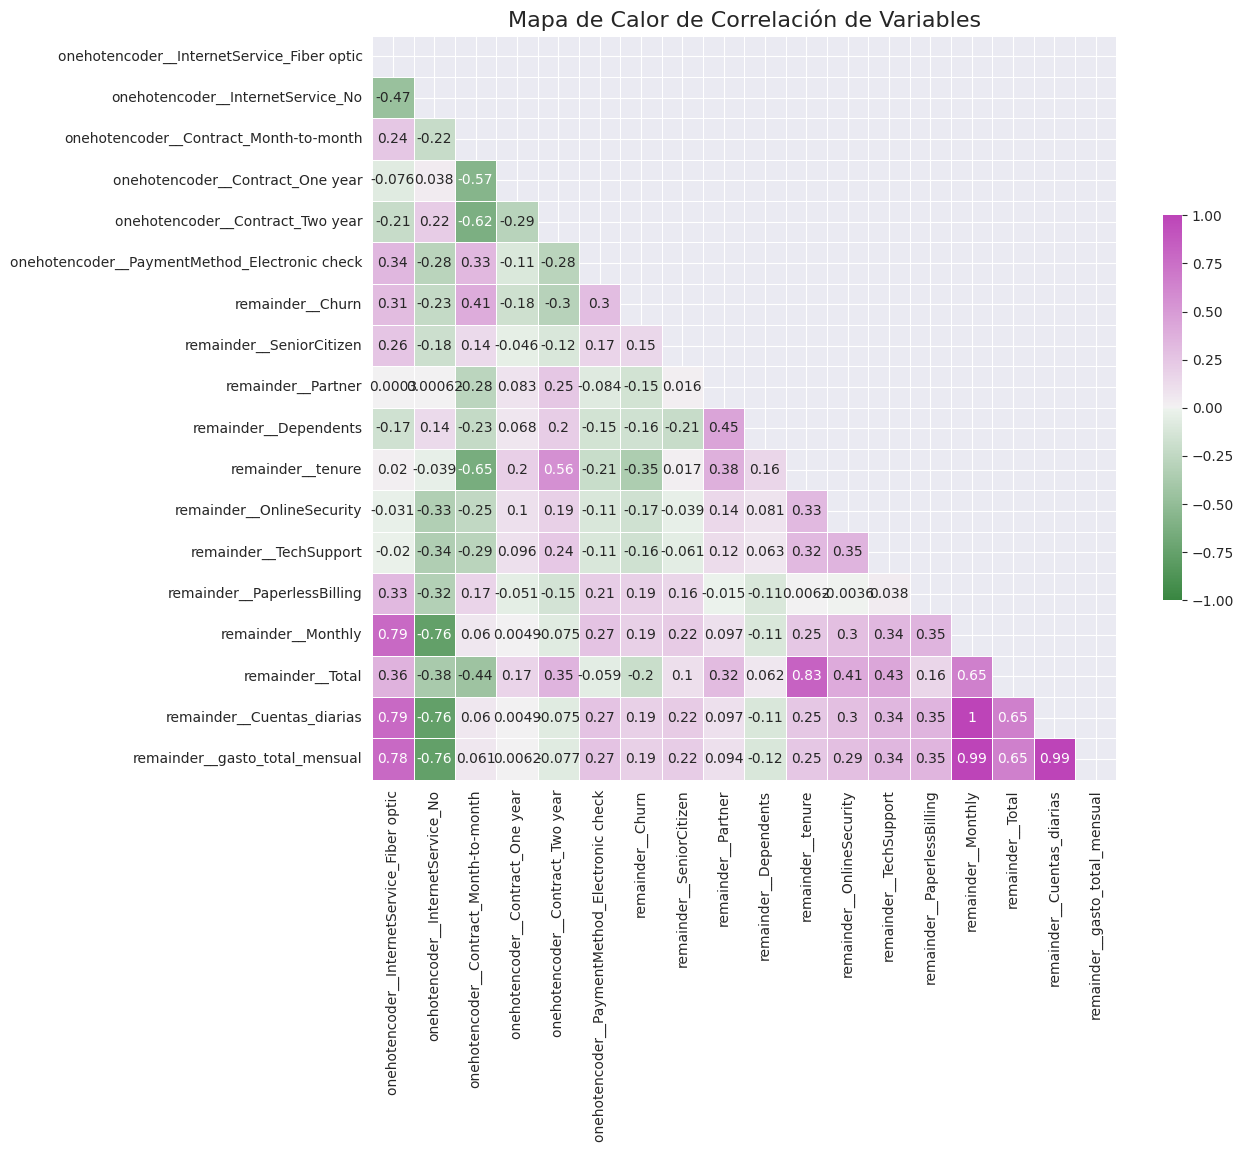

In [34]:
f, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(130, 310, as_cmap=True)
sns_ = sns.heatmap(nueva_corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.setp(sns_.get_xticklabels(), rotation = 90)
plt.title('Mapa de Calor de Correlación de Variables', fontsize=16)
plt.show()

In [35]:
corr_long = nueva_corr.stack().reset_index()

corr_long.columns = ['Variable_1', 'Variable_2', 'Correlacion']

corr_long
print('El análisis indica que se tiene una correlación fuerte entre las variables:')
for index, row in corr_long.iterrows():
    var1 = row['Variable_1']
    var2 = row['Variable_2']
    corr_valor = row['Correlacion']

    if var1 != var2 and abs(corr_valor) >= 0.7 and var1 < var2:
      print(f'{var1} y {var2} \ncon valor de {round(corr_valor,2)}')


El análisis indica que se tiene una correlación fuerte entre las variables:
onehotencoder__InternetService_Fiber optic y remainder__Monthly 
con valor de 0.79
onehotencoder__InternetService_Fiber optic y remainder__Cuentas_diarias 
con valor de 0.79
onehotencoder__InternetService_Fiber optic y remainder__gasto_total_mensual 
con valor de 0.78
onehotencoder__InternetService_No y remainder__Monthly 
con valor de -0.76
onehotencoder__InternetService_No y remainder__Cuentas_diarias 
con valor de -0.76
onehotencoder__InternetService_No y remainder__gasto_total_mensual 
con valor de -0.76
remainder__Monthly y remainder__gasto_total_mensual 
con valor de 0.99
remainder__Total y remainder__tenure 
con valor de 0.83
remainder__Cuentas_diarias y remainder__Monthly 
con valor de 1.0
remainder__Cuentas_diarias y remainder__gasto_total_mensual 
con valor de 0.99


In [36]:
churn_corr = {}
for index, row in corr_long.iterrows():
    var1 = row['Variable_1']
    var2 = row['Variable_2']
    corr_valor = row['Correlacion']
    if var1== 'remainder__Churn':
      churn_corr[var2]= corr_valor
    elif var2== 'remainder__Churn':
      churn_corr[var1]= corr_valor

In [37]:
churn_corr

{'onehotencoder__InternetService_Fiber optic': 0.30801974494482376,
 'onehotencoder__InternetService_No': -0.2278904497560931,
 'onehotencoder__Contract_Month-to-month': 0.4051029106879898,
 'onehotencoder__Contract_One year': -0.17782001834990743,
 'onehotencoder__Contract_Two year': -0.30225346934964975,
 'onehotencoder__PaymentMethod_Electronic check': 0.3019187490112847,
 'remainder__Churn': 1.0,
 'remainder__SeniorCitizen': 0.15088932817647277,
 'remainder__Partner': -0.15044754495917698,
 'remainder__Dependents': -0.1642214015797256,
 'remainder__tenure': -0.352228670113078,
 'remainder__OnlineSecurity': -0.17122629194855238,
 'remainder__TechSupport': -0.16467355590159388,
 'remainder__PaperlessBilling': 0.1918253316664679,
 'remainder__Monthly': 0.19335642223784733,
 'remainder__Total': -0.1983242626039959,
 'remainder__Cuentas_diarias': 0.19335642223784744,
 'remainder__gasto_total_mensual': 0.19330067937591955}

In [38]:
churn_df = pd.DataFrame(list(churn_corr.items()),columns=['Variable', 'Correlacion'])
churn_df=churn_df.sort_values(by='Correlacion', ascending=False)

In [39]:
churn_df.reset_index(drop=True)

,Variable,Correlacion
0,remainder__Churn,1.000000
1,onehotencoder__Contract_Month-to-month,0.405103
2,onehotencoder__InternetService_Fiber optic,0.308020
3,onehotencoder__PaymentMethod_Electronic check,0.301919
4,remainder__Cuentas_diarias,0.193356
5,remainder__Monthly,0.193356
6,remainder__gasto_total_mensual,0.193301
7,remainder__PaperlessBilling,0.191825
8,remainder__SeniorCitizen,0.150889
9,remainder__Partner,-0.150448


In [40]:
print('Las variables con una correlación positiva\nmás fuerte con la variable churn son:')
print(churn_df.iloc[1:4])

Las variables con una correlación positiva
más fuerte con la variable churn son:
                                        Variable  Correlacion
2         onehotencoder__Contract_Month-to-month     0.405103
0     onehotencoder__InternetService_Fiber optic     0.308020
5  onehotencoder__PaymentMethod_Electronic check     0.301919


El análisis muestra que:
- La tasa de cancelación aumenta en conratos mes a mes, lo cual está relacionado con periodos menores de contrato de los usuarios.
- El servicio de fibra óptica presenta una correlación moderada con la cancelación, lo que puede estar relacionado con la insatisfacción con este servicio.
-De igual manera ocurre con el sistema de pago con cheques electrónicos, posiblemente relacionado con clientes menos fieles o contentos con el servicio en general.


In [41]:
print('Las variables con una correlación negativa\nmás fuerte con la variable churn son:')
print(churn_df.iloc[(len(churn_df)-3):len(churn_df)])

Las variables con una correlación negativa
más fuerte con la variable churn son:
                             Variable  Correlacion
1   onehotencoder__InternetService_No    -0.227890
4    onehotencoder__Contract_Two year    -0.302253
10                  remainder__tenure    -0.352229


El análisis sugiere lo siguiente:
- Al aumentar el tiempo de contrato disminuye la tasa de cancelación de clientes, lo cual es sugerido por los contratos de dos años y por el valor de la columna ternure
- El internerService igual a No sugiere que los clientes que no cuentan con el servicio de internet permanecen más en la compañía, lo cual se refuerza con lo mencionado con la correlación de la cancelación con el servicio de fibra óptica.

### Multicolinealidad del modelo

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

In [43]:
X = datos_normalizados.drop('remainder__Churn', axis=1)

In [44]:
X_const = add_constant(X)
X_const.head()

,const,onehotencoder__gender_Female,onehotencoder__gender_Male,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Bank transfer (automatic),...,remainder__OnlineBackup,remainder__DeviceProtection,remainder__TechSupport,remainder__StreamingTV,remainder__StreamingMovies,remainder__PaperlessBilling,remainder__Monthly,remainder__Total,remainder__Cuentas_diarias,remainder__gasto_total_mensual
0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.471144,0.068315,0.471144,0.543017
1,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.414428,0.062454,0.414428,0.496431
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.553731,0.032338,0.553731,0.578357
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,0.793532,0.142531,0.793532,0.784343
4,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.653234,0.030789,0.653234,0.734212


In [45]:
def calculo_VIF(dataFrame):
  pd.options.display.float_format = '{:.2f}'.format
  vif_data = pd.DataFrame()
  vif_data["Variable"] = dataFrame.columns
  vif_data["VIF"] = [vif(dataFrame.values, i) for i in range(dataFrame.shape[1])]
  return vif_data.sort_values(by="VIF", ascending=False)

In [46]:
calculo_VIF(X_const)

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,Variable,VIF
9,onehotencoder__PaymentMethod_Bank transfer (au...,2061469017.60
8,onehotencoder__Contract_Two year,1007340128.94
5,onehotencoder__InternetService_No,540050755.06
4,onehotencoder__InternetService_Fiber optic,522705728.62
11,onehotencoder__PaymentMethod_Electronic check,468829159.29
10,onehotencoder__PaymentMethod_Credit card (auto...,42017641.56
2,onehotencoder__gender_Male,2206991.18
7,onehotencoder__Contract_One year,2034679.74
6,onehotencoder__Contract_Month-to-month,1980025.32
3,onehotencoder__InternetService_DSL,458604.39


Eliminaremos las primeras columas de cada categoría con el valor más alto

In [47]:
columnas_to_drop = ['onehotencoder__gender_Male', 'onehotencoder__InternetService_No',
                    'onehotencoder__Contract_Two year' , 'onehotencoder__PaymentMethod_Bank transfer (automatic)']

In [48]:
X_const.drop(columns=columnas_to_drop, inplace=True)

In [49]:
X_const.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   const                                                 7043 non-null   float64
 1   onehotencoder__gender_Female                          7043 non-null   float64
 2   onehotencoder__InternetService_DSL                    7043 non-null   float64
 3   onehotencoder__InternetService_Fiber optic            7043 non-null   float64
 4   onehotencoder__Contract_Month-to-month                7043 non-null   float64
 5   onehotencoder__Contract_One year                      7043 non-null   float64
 6   onehotencoder__PaymentMethod_Credit card (automatic)  7043 non-null   float64
 7   onehotencoder__PaymentMethod_Electronic check         7043 non-null   float64
 8   onehotencoder__PaymentMethod_Mailed check             7043

Recalculamos el valor de VIF

In [50]:
calculo_VIF(X_const)

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Variable,VIF
24,remainder__Cuentas_diarias,inf
22,remainder__Monthly,inf
3,onehotencoder__InternetService_Fiber optic,591.22
0,const,394.58
2,onehotencoder__InternetService_DSL,138.52
25,remainder__gasto_total_mensual,90.03
13,remainder__PhoneService,34.86
20,remainder__StreamingMovies,24.11
19,remainder__StreamingTV,24.06
23,remainder__Total,10.84


Repetimos el proceso eliminando las primeras tres columnas, la cual está en el listado de las columnas con una alta correlación.

In [51]:
columnas_to_drop = ['remainder__Cuentas_diarias','remainder__Monthly','onehotencoder__InternetService_Fiber optic']

In [52]:
X_const.drop(columns=columnas_to_drop, inplace=True)

In [53]:
valor_dif = calculo_VIF(X_const)
valor_dif

,Variable,VIF
0,const,48.63
21,remainder__Total,10.80
11,remainder__tenure,7.46
22,remainder__gasto_total_mensual,6.92
3,onehotencoder__Contract_Month-to-month,3.57
6,onehotencoder__PaymentMethod_Electronic check,1.98
19,remainder__StreamingMovies,1.97
18,remainder__StreamingTV,1.94
7,onehotencoder__PaymentMethod_Mailed check,1.86
2,onehotencoder__InternetService_DSL,1.79


In [54]:
valor_dif.to_csv('vif.csv', index=False)

Eliminamos el remainder__Total

In [55]:
X_const.drop(columns='remainder__Total', inplace=True)

In [56]:
vif_final = calculo_VIF(X_const)
vif_final.reset_index(drop=True)

,Variable,VIF
0,const,39.70
1,remainder__gasto_total_mensual,5.72
2,onehotencoder__Contract_Month-to-month,3.55
3,remainder__tenure,2.78
4,onehotencoder__PaymentMethod_Electronic check,1.97
5,remainder__StreamingMovies,1.95
6,remainder__StreamingTV,1.92
7,onehotencoder__PaymentMethod_Mailed check,1.84
8,onehotencoder__InternetService_DSL,1.76
9,onehotencoder__Contract_One year,1.69


In [57]:
predictorias_finales = list(vif_final['Variable'].drop(index=0))
predictorias_finales

['remainder__gasto_total_mensual',
 'onehotencoder__Contract_Month-to-month',
 'remainder__tenure',
 'onehotencoder__PaymentMethod_Electronic check',
 'remainder__StreamingMovies',
 'remainder__StreamingTV',
 'onehotencoder__PaymentMethod_Mailed check',
 'onehotencoder__InternetService_DSL',
 'onehotencoder__Contract_One year',
 'remainder__DeviceProtection',
 'remainder__TechSupport',
 'onehotencoder__PaymentMethod_Credit card (automatic)',
 'remainder__PhoneService',
 'remainder__OnlineSecurity',
 'remainder__MultipleLines',
 'remainder__OnlineBackup',
 'remainder__Partner',
 'remainder__Dependents',
 'remainder__PaperlessBilling',
 'remainder__SeniorCitizen',
 'onehotencoder__gender_Female']

## Análisis Dirigido

In [58]:
datos_normalizados.columns

Index(['onehotencoder__gender_Female', 'onehotencoder__gender_Male',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No',
       'onehotencoder__Contract_Month-to-month',
       'onehotencoder__Contract_One year', 'onehotencoder__Contract_Two year',
       'onehotencoder__PaymentMethod_Bank transfer (automatic)',
       'onehotencoder__PaymentMethod_Credit card (automatic)',
       'onehotencoder__PaymentMethod_Electronic check',
       'onehotencoder__PaymentMethod_Mailed check', 'remainder__Churn',
       'remainder__SeniorCitizen', 'remainder__Partner',
       'remainder__Dependents', 'remainder__tenure', 'remainder__PhoneService',
       'remainder__MultipleLines', 'remainder__OnlineSecurity',
       'remainder__OnlineBackup', 'remainder__DeviceProtection',
       'remainder__TechSupport', 'remainder__StreamingTV',
       'remainder__StreamingMovies', 'remainder__PaperlessBilling',
       'rema

In [59]:
def analisis_dirigido(columna1, columna2):
  print(f'El análisis de correlación de la columna {columna1} y columna {columna2} indica lo siguiente')
  print(datos[[columna1, columna2]].corr())

  plt.figure(figsize=(8, 6), facecolor='#d9d9d9')
  ax = plt.axes()
  ax.set_facecolor('#d9d9d9')
  ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
  ax.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)

  sns.boxplot(x=columna1, y=columna2, palette='Paired', hue=columna1, data=datos, legend=False)
  plt.title(f'Distribución de la columna {columna2} en la Cancelación', fontsize=16)
  plt.ylabel(f'{columna2}',fontsize=12)
  plt.xlabel('Cancelación', fontsize=12)
  plt.xticks(ticks=[0.0, 1.0], labels=['No', 'Sí'])

  plt.show()



El análisis de correlación de la columna remainder__Churn y columna remainder__tenure indica lo siguiente
                   remainder__Churn  remainder__tenure
remainder__Churn               1.00              -0.35
remainder__tenure             -0.35               1.00


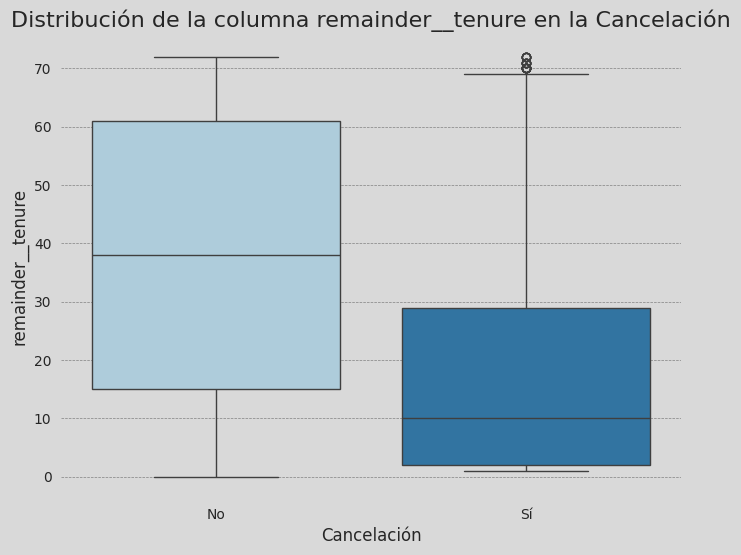

In [60]:
analisis_dirigido('remainder__Churn', 'remainder__tenure')

- El análisis muestra una tendencia negativa débil.
- El valor de correlación de -0.35 sugiere que al aumentar el tiempo de contrato disminuye el índice de cancelación de los clientes.
- Esto último se verifica en el boxplot generado, en donde se observa que la cancelación se distribuye en su mayoría sobre los primeros meses de contrato.

El análisis de correlación de la columna remainder__Churn y columna remainder__Total indica lo siguiente
                  remainder__Churn  remainder__Total
remainder__Churn              1.00             -0.20
remainder__Total             -0.20              1.00


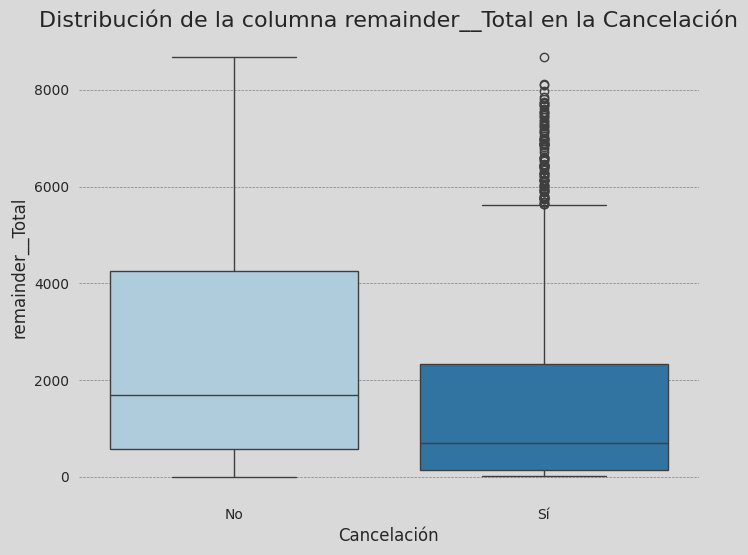

In [61]:
analisis_dirigido('remainder__Churn', 'remainder__Total')

- El análisis indica una correlación negativa débil de aproximadamente -0.20, lo cual sugiere de manera inicial que al aumentar el gasto total suele disminuir la cancelación por parte de los clientes.
- La tendencia de un gasto total menor relacionada con la cancelación puede estar relacionada con el alto nivel de cancelación en los primeros meses de contrato.

In [62]:
datos[['remainder__tenure', 'remainder__Total']].corr()

,remainder__tenure,remainder__Total
remainder__tenure,1.00,0.83
remainder__Total,0.83,1.00


- La correlación positiva fuerte en el tiempo de contrato (Ternure) confirma el punto antes mencionado, en donde al aumentar el tiempo de contrato suele aumentar el gasto total.

# 🤖 Modelado Predictivo

## Separación de Datos

In [63]:
X = datos_normalizados.drop('remainder__Churn', axis=1)
y = datos_normalizados['remainder__Churn']

Para la posterior creación, evaluación y validación del modelo, vamos a crear un conjunto de datos para cada caso

In [64]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=13)
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=13)

### Balanceo de los datos

Como observamos anteriormente, tenemos un desbalanceo de los valores entre ambos modelos, lo cual puede interferir con la detección del volumen de cancelación


In [65]:
(y.value_counts(normalize=True)*100).round(2)

,proportion
remainder__Churn,
0.00,73.46
1.00,26.54


In [66]:
print(f'Contamos con un total de {len(y)} valores')

Contamos con un total de 5634 valores


#### Oversampling

In [67]:
from imblearn.over_sampling import SMOTE

In [68]:
oversampling = SMOTE()
x_over,y_over = oversampling.fit_resample(X,y)

In [69]:
print(x_over.info())
print('-'*50)
print(y_over.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8278 entries, 0 to 8277
Data columns (total 29 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   onehotencoder__gender_Female                            8278 non-null   float64
 1   onehotencoder__gender_Male                              8278 non-null   float64
 2   onehotencoder__InternetService_DSL                      8278 non-null   float64
 3   onehotencoder__InternetService_Fiber optic              8278 non-null   float64
 4   onehotencoder__InternetService_No                       8278 non-null   float64
 5   onehotencoder__Contract_Month-to-month                  8278 non-null   float64
 6   onehotencoder__Contract_One year                        8278 non-null   float64
 7   onehotencoder__Contract_Two year                        8278 non-null   float64
 8   onehotencoder__PaymentMethod_Bank tran

In [70]:
(y_over.value_counts(normalize=True)*100).round(2)

,proportion
remainder__Churn,
1.00,50.00
0.00,50.00


In [71]:
print(f'Contamos con un total de {len(y_over)} valores, teniendo una diferencia de {len(y_over) - len(y)} con respecto al arreglo original')

Contamos con un total de 8278 valores, teniendo una diferencia de 2644 con respecto al arreglo original


Para evaluar el posible impacto sobre del DataFrame, se visualiza la distribución de las variables numéricas

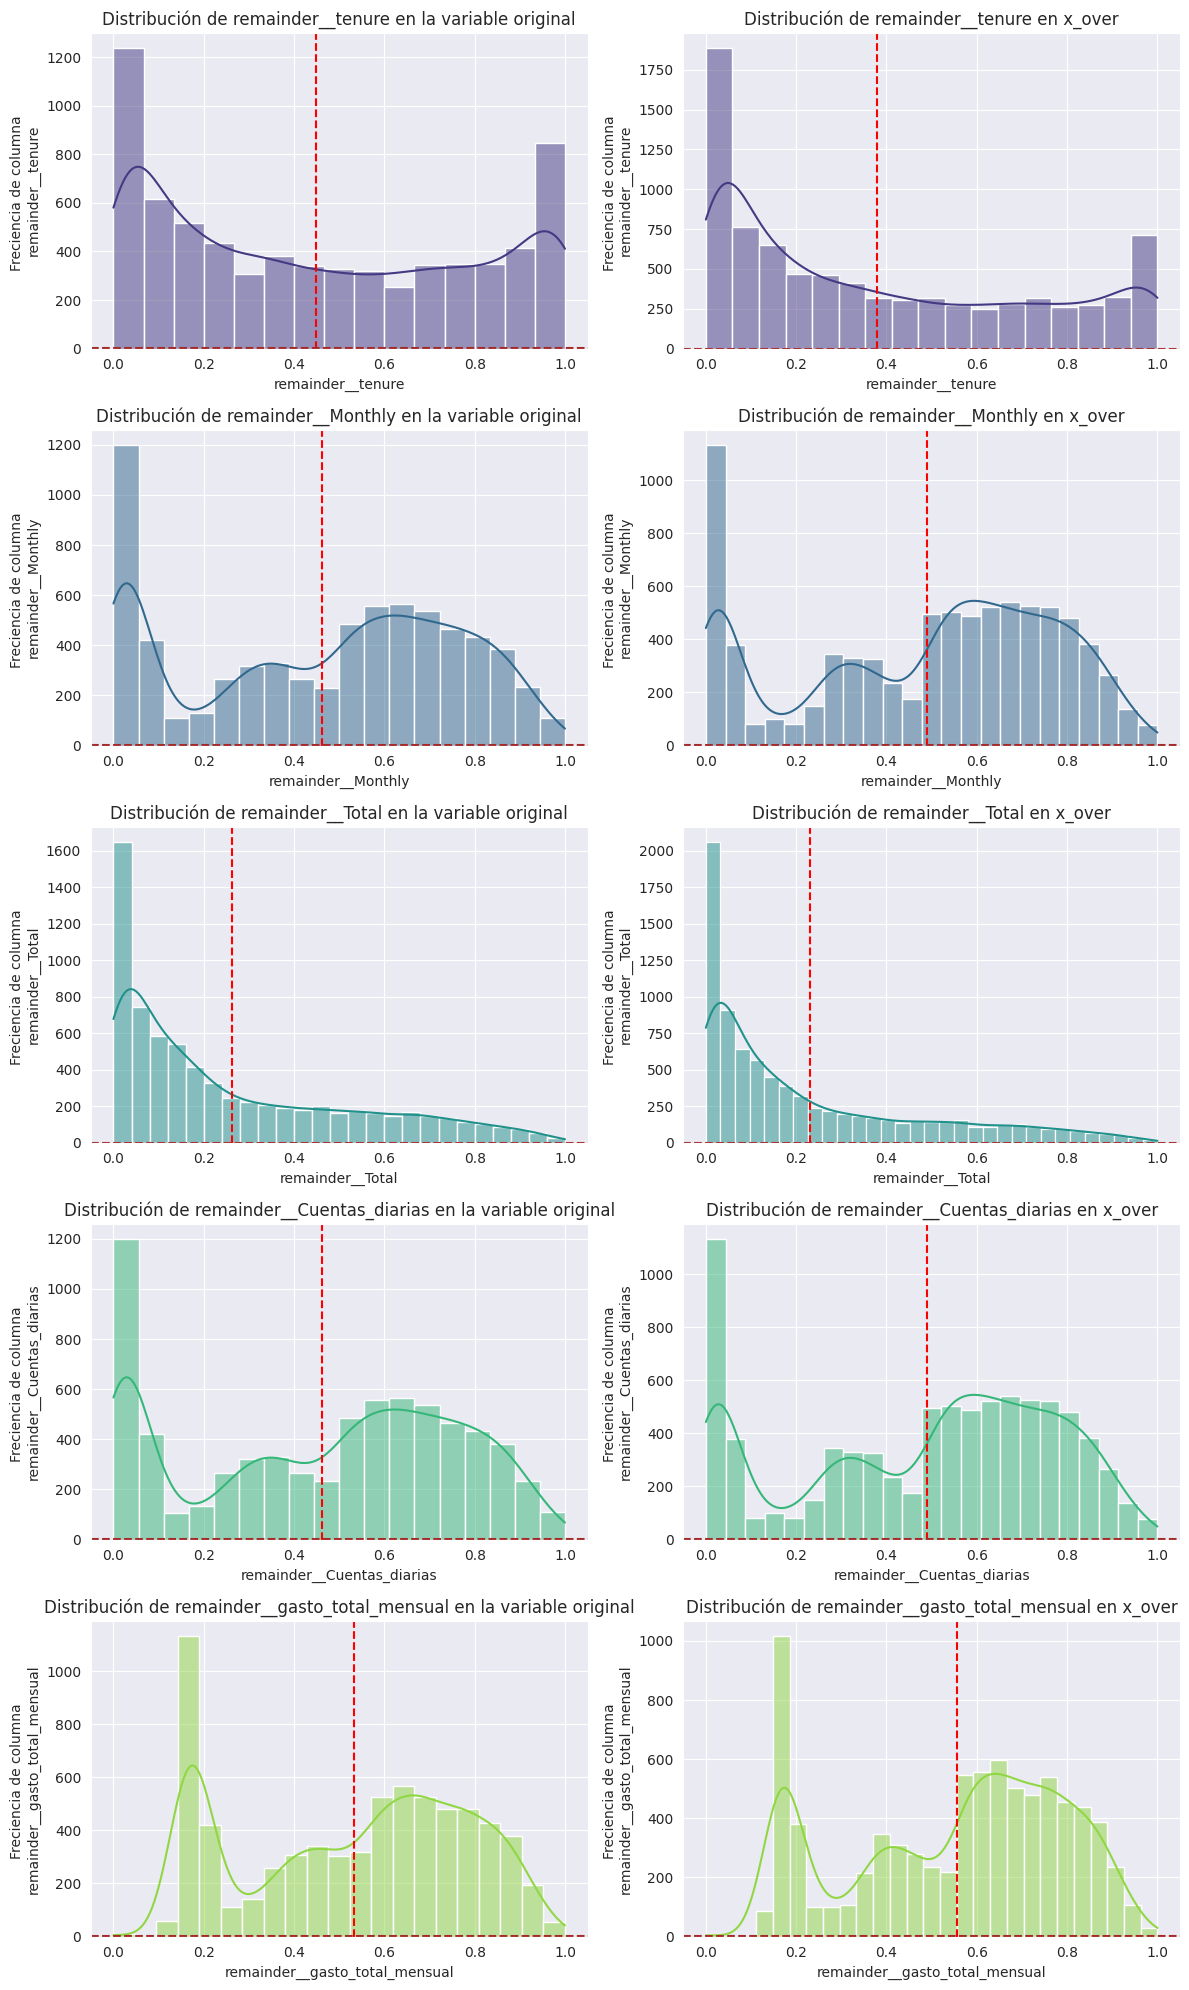

In [72]:
n_columnas = len(columnas_escala)
n_filas = 2

sns.set_style('darkgrid')
fig, axes = plt.subplots(n_columnas, n_filas, figsize=(12, 20))
axes = axes.flatten()

color_palette = sns.color_palette('viridis', n_columnas)

for i, columna in enumerate(columnas_escala):
  promedio = x_over[columna].mean()
  mediana = x_over[columna].median()
  ax_histplot_1 = axes[i*2]
  ax_histplot = axes[i * 2 + 1]

  promedio_normalizado = datos_normalizados[columna].mean()
  mediana_normalizado = datos_normalizados[columna].median()
  binwidth = ancho_bin(datos_normalizados, columna)
  sns.histplot(datos_normalizados[columna], kde=True, ax=ax_histplot_1, binwidth=binwidth, color=color_palette[i])
  ax_histplot_1.set_title(f'Distribución de {columna} en la variable original')
  ax_histplot_1.set_ylabel(f'Freciencia de columna \n{columna}')
  ax_histplot_1.axvline(x=promedio_normalizado, color= 'red', linestyle = '--', label='Promedio' )
  ax_histplot_1.axhline(y=mediana_normalizado, color= 'brown', linestyle = '--', label='mediana')
  ax_histplot_1.set_xlabel(f'{columna}')


  binwidth = ancho_bin(x_over, columna)
  sns.histplot(x_over[columna], kde=True, ax=ax_histplot, binwidth=binwidth, color=color_palette[i])
  ax_histplot.set_title(f'Distribución de {columna} en x_over')
  ax_histplot.set_ylabel(f'Freciencia de columna \n{columna}')
  ax_histplot.axvline(x=promedio, color= 'red', linestyle = '--', label='Promedio' )
  ax_histplot.axhline(y=mediana, color= 'brown', linestyle = '--', label='mediana')
  ax_histplot.set_xlabel(f'{columna}')

plt.tight_layout()
plt.show()

El Oversampling no parece afectar la distribución de mi modelo

#### Creación de conjunto de entrenamiento y prueba

In [73]:
x_over, X_over_test, y_over, y_over_test = train_test_split(x_over, y_over, test_size=0.2, stratify=y_over, random_state=13)
X_over_train, X_over_val, y_over_train, y_over_val = train_test_split(x_over, y_over, stratify=y_over, random_state=13)

#### Undersampling

In [74]:
from imblearn.under_sampling import NearMiss

In [75]:
nm = NearMiss(version=3, n_neighbors=5)
x_under, y_under = nm.fit_resample(X, y)

In [76]:
(y_under.value_counts(normalize=True)*100).round(2)

,proportion
remainder__Churn,
0.00,50.00
1.00,50.00


In [77]:
print(f'Contamos con un total de {len(y_under)} valores, teniendo una diferencia de {len(y_under) - len(y)} con respecto al arreglo original')

Contamos con un total de 2990 valores, teniendo una diferencia de -2644 con respecto al arreglo original


Para evaluar el posible impacto sobre del DataFrame, se visualiza la distribución de las variables numéricas

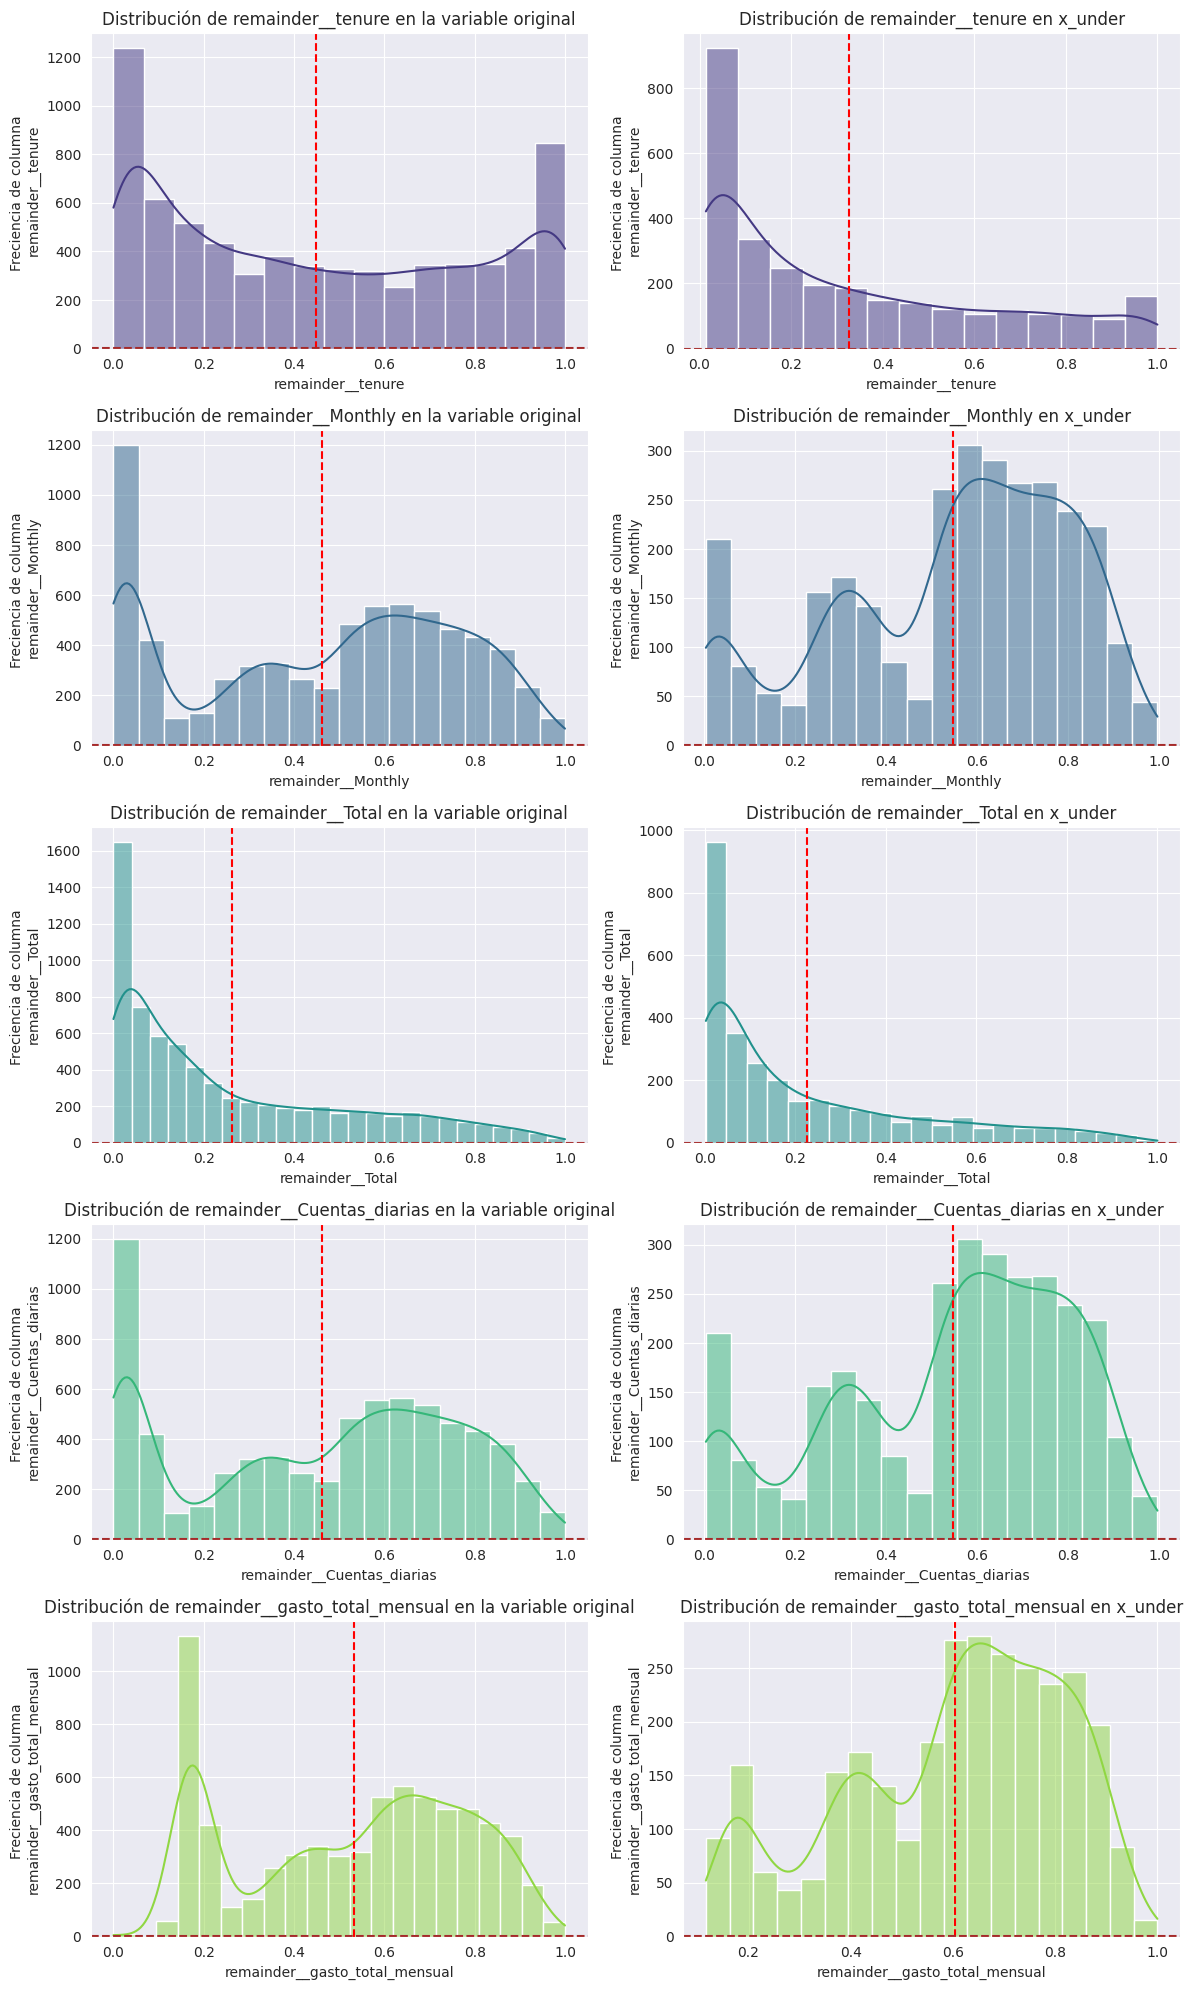

In [78]:
n_columnas = len(columnas_escala)
n_filas = 2

sns.set_style('darkgrid')
fig, axes = plt.subplots(n_columnas, n_filas, figsize=(12, 20))
axes = axes.flatten()

color_palette = sns.color_palette('viridis', n_columnas)

for i, columna in enumerate(columnas_escala):
  promedio = x_under[columna].mean()
  mediana = x_under[columna].median()
  ax_histplot_1 = axes[i*2]
  ax_histplot = axes[i * 2 + 1]

  promedio_normalizado = datos_normalizados[columna].mean()
  mediana_normalizado = datos_normalizados[columna].median()
  binwidth = ancho_bin(datos_normalizados, columna)
  sns.histplot(datos_normalizados[columna], kde=True, ax=ax_histplot_1, binwidth=binwidth, color=color_palette[i])
  ax_histplot_1.set_title(f'Distribución de {columna} en la variable original')
  ax_histplot_1.set_ylabel(f'Freciencia de columna \n{columna}')
  ax_histplot_1.axvline(x=promedio_normalizado, color= 'red', linestyle = '--', label='Promedio' )
  ax_histplot_1.axhline(y=mediana_normalizado, color= 'brown', linestyle = '--', label='mediana')
  ax_histplot_1.set_xlabel(f'{columna}')


  binwidth = ancho_bin(x_under, columna)
  sns.histplot(x_under[columna], kde=True, ax=ax_histplot, binwidth=binwidth, color=color_palette[i])
  ax_histplot.set_title(f'Distribución de {columna} en x_under')
  ax_histplot.set_ylabel(f'Freciencia de columna \n{columna}')
  ax_histplot.axvline(x=promedio, color= 'red', linestyle = '--', label='Promedio' )
  ax_histplot.axhline(y=mediana, color= 'brown', linestyle = '--', label='mediana')
  ax_histplot.set_xlabel(f'{columna}')

plt.tight_layout()
plt.show()

Al hacer un balanceo de los datos observamos que tenemos un impacto en la distribución de los valores numéricos de mi conjunto de datos dentro del DataFrame X.
Considerando que las variaciones en la distribución pudiera llegar a afectar en cómo el sistema va a generalizar y predecir los datos nuevos, se descarta el uso de los datos obtenidos en esta aplicación.

In [79]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)

X_smote_enn, y_smote_enn = smote_enn.fit_resample(X, y)

In [80]:
(y_smote_enn.value_counts(normalize=True)*100).round(2)

,proportion
remainder__Churn,
1.00,55.50
0.00,44.50


In [81]:
print(f'Contamos con un total de {len(y_smote_enn)} valores, teniendo una diferencia de {len(y_smote_enn) - len(y)} con respecto al arreglo original')

Contamos con un total de 5049 valores, teniendo una diferencia de -585 con respecto al arreglo original


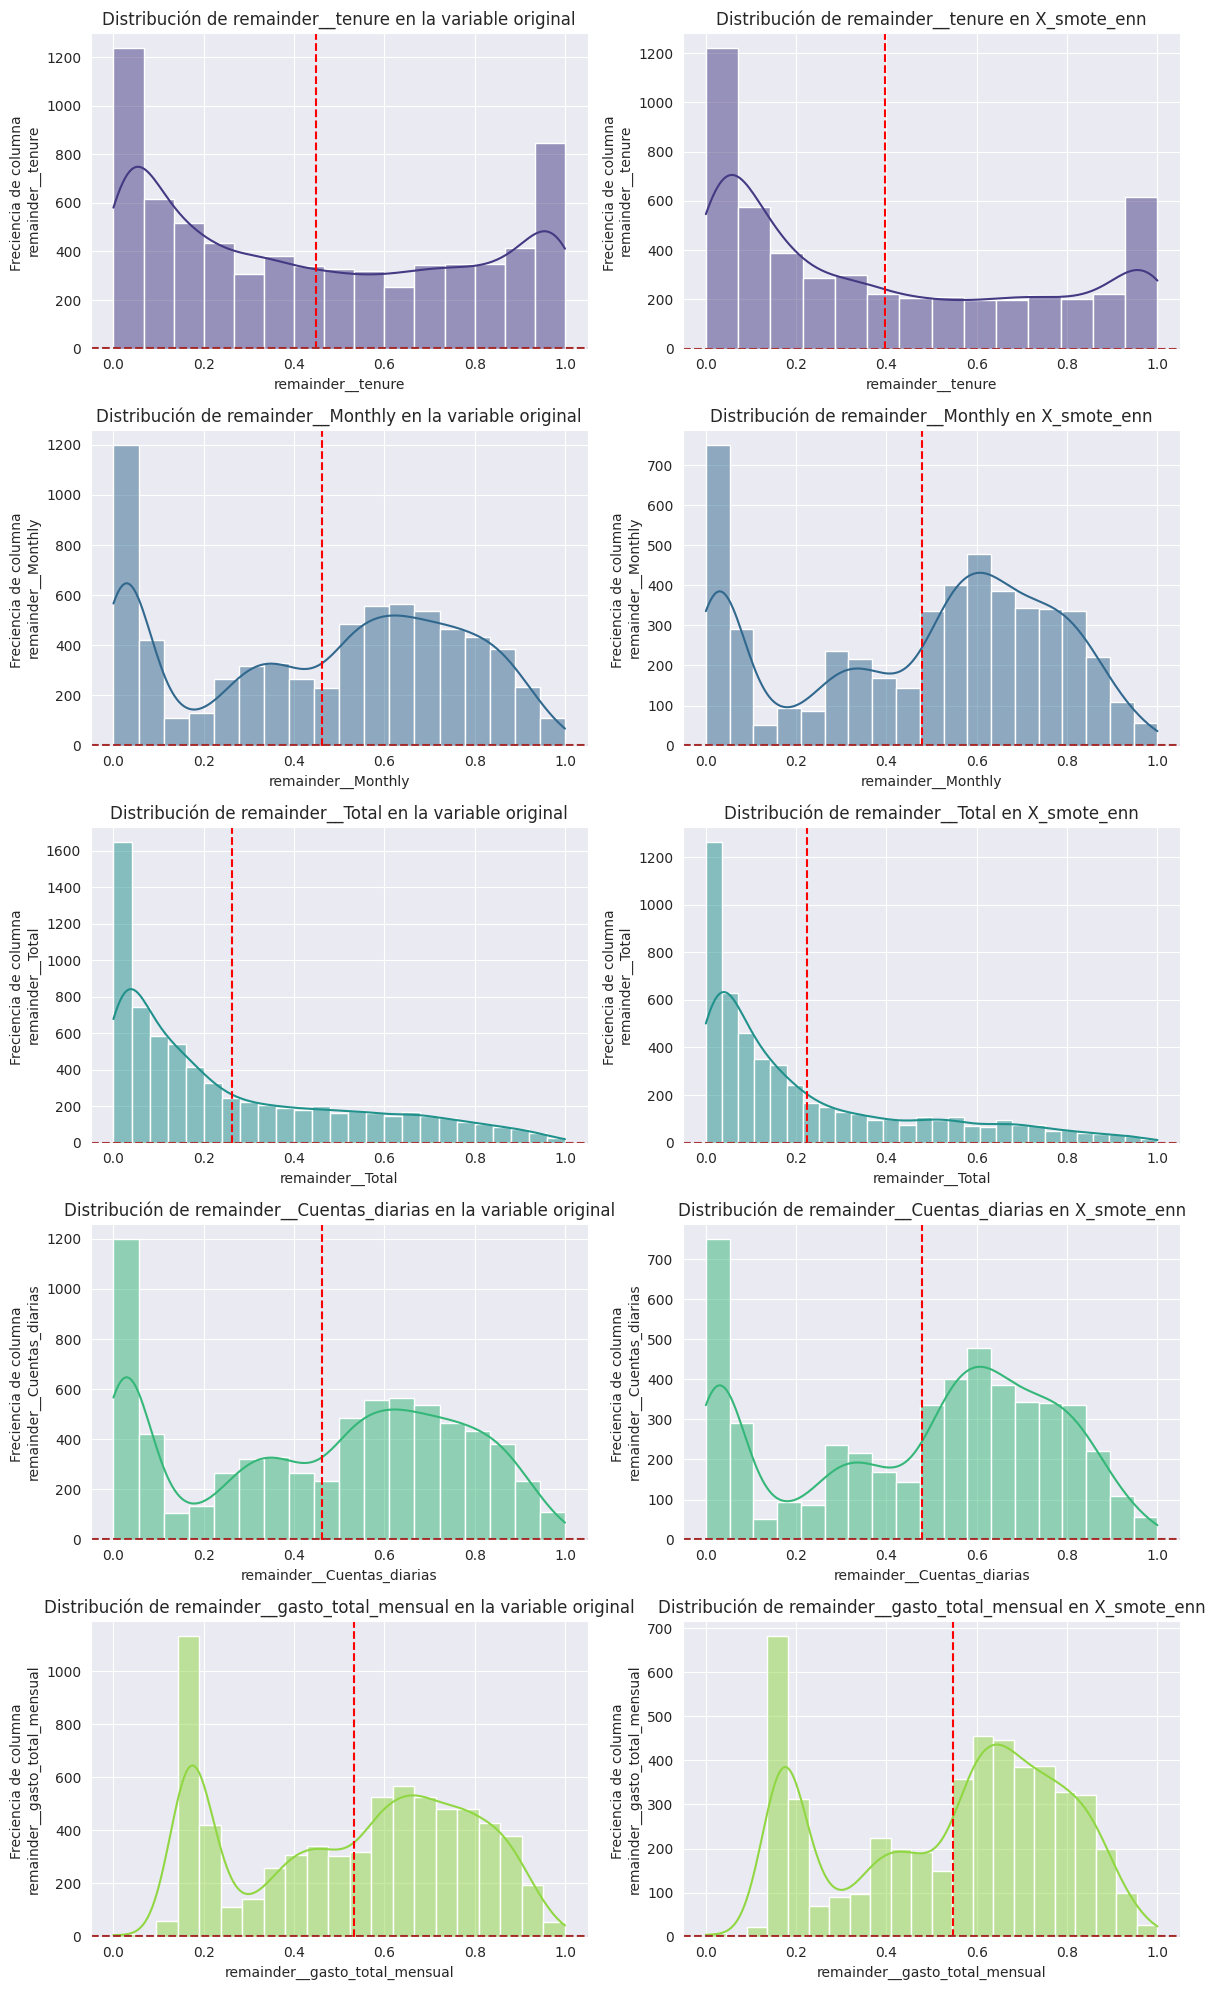

In [82]:
n_columnas = len(columnas_escala)
n_filas = 2

sns.set_style('darkgrid')
fig, axes = plt.subplots(n_columnas, n_filas, figsize=(12, 20))
axes = axes.flatten()

color_palette = sns.color_palette('viridis', n_columnas)

for i, columna in enumerate(columnas_escala):
  promedio = X_smote_enn[columna].mean()
  mediana = X_smote_enn[columna].median()
  ax_histplot_1 = axes[i*2]
  ax_histplot = axes[i * 2 + 1]

  promedio_normalizado = datos_normalizados[columna].mean()
  mediana_normalizado = datos_normalizados[columna].median()
  binwidth = ancho_bin(datos_normalizados, columna)
  sns.histplot(datos_normalizados[columna], kde=True, ax=ax_histplot_1, binwidth=binwidth, color=color_palette[i])
  ax_histplot_1.set_title(f'Distribución de {columna} en la variable original')
  ax_histplot_1.set_ylabel(f'Freciencia de columna \n{columna}')
  ax_histplot_1.axvline(x=promedio_normalizado, color= 'red', linestyle = '--', label='Promedio' )
  ax_histplot_1.axhline(y=mediana_normalizado, color= 'brown', linestyle = '--', label='mediana')
  ax_histplot_1.set_xlabel(f'{columna}')


  binwidth = ancho_bin(X_smote_enn, columna)
  sns.histplot(X_smote_enn[columna], kde=True, ax=ax_histplot, binwidth=binwidth, color=color_palette[i])
  ax_histplot.set_title(f'Distribución de {columna} en X_smote_enn')
  ax_histplot.set_ylabel(f'Freciencia de columna \n{columna}')
  ax_histplot.axvline(x=promedio, color= 'red', linestyle = '--', label='Promedio' )
  ax_histplot.axhline(y=mediana, color= 'brown', linestyle = '--', label='mediana')
  ax_histplot.set_xlabel(f'{columna}')

plt.tight_layout()
plt.show()

Al utilizar SMOTEENN obtenemos conjuntos de datos casi perfectamente equilibrados (con un valor de 55.4 y 45.6), además de una distribución de valores similar al de conjunto de datos originales. Por lo cual, se mantiene esta distribución.

#### Creación de conjunto de entrenamiento y prueba

In [83]:
X_smote_enn, X_smote_test, y_smote_enn, y_smote_test = train_test_split(X_smote_enn, y_smote_enn, test_size=0.3, stratify=y_smote_enn, random_state=13)
X_smote_train, X_smote_val, y_smote_train, y_smote_val = train_test_split(X_smote_enn, y_smote_enn, stratify=y_smote_enn, random_state=13)

## Creación de Modelos

### Modelo de Base

In [84]:
from sklearn.dummy import DummyClassifier

In [85]:
baseline = DummyClassifier()
baseline.fit(X_train, y_train)

DummyClassifier()

In [86]:
baseline.score(X_val, y_val)

0.7345635202271115

#### Evaluación del modelo


In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [88]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [89]:
from sklearn.metrics import confusion_matrix

En el caso de los modelos que estemos evaluando de manera inicial, basaremos nuestra predicción en base al parámetro Recall para minimizar los falsos negativos para maximizar la capacidad de la empresa para detectar clientes con potencial de cancelación y así mitigar la cancelación con estrategias de prevención como promover descuentos o estrategias de retención de clientes

### Requiere normalización


#### KNN


##### Evaluación con datos normalizados

In [90]:
from sklearn.neighbors import KNeighborsClassifier

In [91]:
kn = KNeighborsClassifier()

In [92]:
kn.fit(X_train, y_train)

KNeighborsClassifier()

In [93]:
kn.score(X_val, y_val)

0.7444996451383961

In [94]:
y_previsto_knn = kn.predict(X_val)

In [95]:
def evaluacion_matriz_confusion(y_validacion, y_prevista):
  print(classification_report(y_validacion,y_prevista))

  matriz_confusion = confusion_matrix(y_validacion,y_prevista)
  visualizacion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion, display_labels=['No Churn','Churn'])
  visualizacion.plot()

  ax = plt.gca()
  ax.grid(False)
  plt.show()

              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83      1035
         1.0       0.52      0.47      0.50       374

    accuracy                           0.74      1409
   macro avg       0.67      0.66      0.66      1409
weighted avg       0.74      0.74      0.74      1409



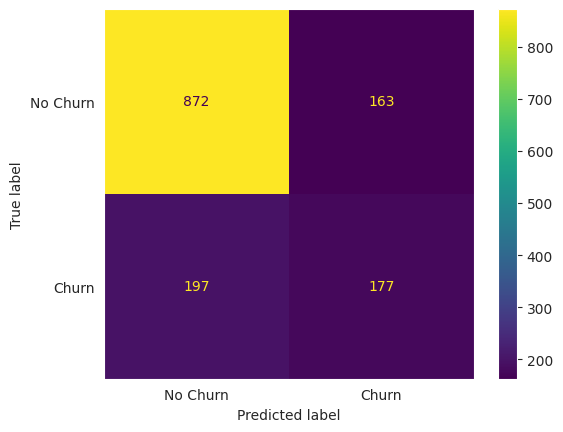

In [96]:
evaluacion_matriz_confusion(y_val, y_previsto_knn)

El modelo Knn con los datos normalizados originales sólo es capaz de predecir los valores con Churn el 0.47 veces los Clientes que dejarán la compañía

##### Evaluación con datos balanceados

- Smote

In [97]:
kn_over = KNeighborsClassifier()

In [98]:
kn_over.fit(X_over_train, y_over_train)

KNeighborsClassifier()

In [99]:
kn_over.score(X_over_val, y_over_val)

0.7735507246376812

In [100]:
y_previsto_knn_over = kn_over.predict(X_over_val)

              precision    recall  f1-score   support

         0.0       0.87      0.64      0.74       828
         1.0       0.72      0.91      0.80       828

    accuracy                           0.77      1656
   macro avg       0.79      0.77      0.77      1656
weighted avg       0.79      0.77      0.77      1656



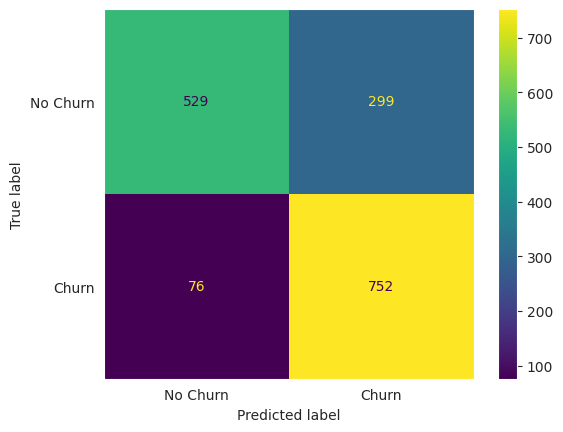

In [101]:
evaluacion_matriz_confusion(y_over_val, y_previsto_knn_over)

El modelo con datos balanceados mediante Smote presenta valores balanceados y es capaz de predecir valores con un índice de 0.9. Sin embargo, aumentó el número de falsos positivos.

- SMOTEENN

In [102]:
kn_smoteenn = KNeighborsClassifier()

In [103]:
kn_smoteenn.fit(X_smote_train, y_smote_train)

KNeighborsClassifier()

In [104]:
kn_smoteenn.score(X_smote_val, y_smote_val)

0.9343891402714932

In [105]:
y_previsto_knn_smoteenn = kn_smoteenn.predict(X_smote_val)

              precision    recall  f1-score   support

         0.0       0.97      0.88      0.92       393
         1.0       0.91      0.98      0.94       491

    accuracy                           0.93       884
   macro avg       0.94      0.93      0.93       884
weighted avg       0.94      0.93      0.93       884



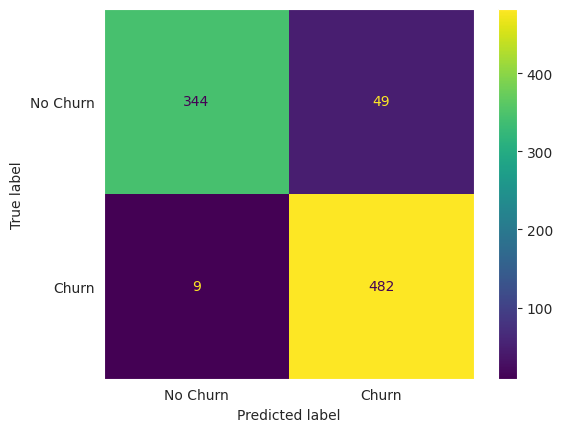

In [106]:
evaluacion_matriz_confusion(y_smote_val, y_previsto_knn_smoteenn)

Los datos balanceados mediante el Smoteenn han permitido predecir con un índice de 0.98 los clientes que estarían dejando la compañía en un futuro.
Esta aplicación buscará ser optimizada posteriormente.

#### Regresión logística

##### Evaluación con datos normalizados

In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
lr = LogisticRegression(random_state=13)
lr.fit(X_train, y_train)

LogisticRegression(random_state=13)

In [109]:
lr.score(X_val,y_val)

0.7963094393186657

In [110]:
y_previsto_lr = lr.predict(X_val)

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      1035
         1.0       0.64      0.54      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



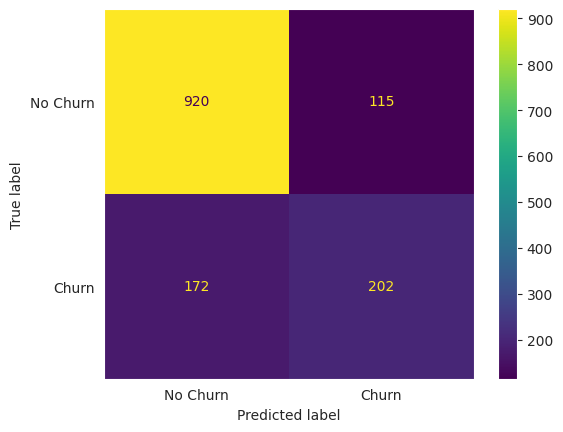

In [111]:
evaluacion_matriz_confusion(y_val, y_previsto_lr)

El modelo, de manera inicial, solo tiene la sensibilidad los clientes que abandonarán la compañía con un índice de 0.54. Para determinar si el análisis VIF realizado previamente nos permite optimizar el modelo con las variables que observamos que no presentan multicolinealidad.

In [112]:
X_train_filtrado = X_train[predictorias_finales]
X_val_filtrado = X_val[predictorias_finales]

In [113]:
lr_filtrado = LogisticRegression(random_state=13)
lr_filtrado.fit(X_train_filtrado, y_train)

LogisticRegression(random_state=13)

In [114]:
lr_filtrado.score(X_val_filtrado,y_val)

0.7963094393186657

In [115]:
y_previsto_lr_filtrado = lr_filtrado.predict(X_val_filtrado)

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1035
         1.0       0.65      0.51      0.57       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



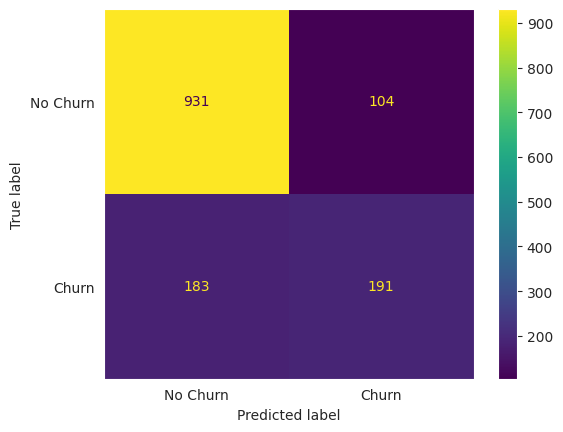

In [116]:
evaluacion_matriz_confusion(y_val, y_previsto_lr_filtrado)

La multicolinealidad de variables parece no afectar. Al contrario, al descartar variables el sistema parece haber perdido la capacidad de predecir correctamente casos donde los clientes dejan la compañía (Sensibilidad)

##### Evaluación con datos balanceados

- SMOTE

In [117]:
lr_over = LogisticRegression(random_state=13)
lr_over.fit(X_over_train, y_over_train)

LogisticRegression(random_state=13)

In [118]:
lr_over.score(X_over_val,y_over_val)

0.7620772946859904

In [119]:
y_previsto_lr_over = lr_over.predict(X_over_val)

              precision    recall  f1-score   support

         0.0       0.79      0.72      0.75       828
         1.0       0.74      0.81      0.77       828

    accuracy                           0.76      1656
   macro avg       0.76      0.76      0.76      1656
weighted avg       0.76      0.76      0.76      1656



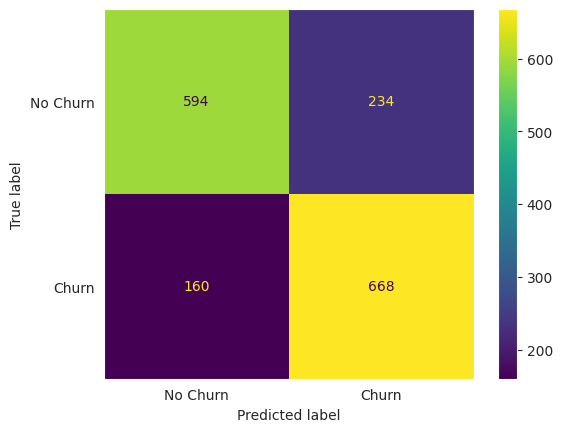

In [120]:
evaluacion_matriz_confusion(y_over_val, y_previsto_lr_over)

El entrenamiento mediante datos con el método SMOTE permite predecir con mayor certeza la cantidad de clientes que han dejado la compañía, en este caso teniendo un índice de 0.79

- SMOTEENN

In [121]:
lr_smoteenn = LogisticRegression(random_state=13)
lr_smoteenn.fit(X_smote_train, y_smote_train)

LogisticRegression(random_state=13)

In [122]:
lr_smoteenn.score(X_smote_val,y_smote_val)

0.9015837104072398

In [123]:
y_previsto_lr_smoteen = lr_smoteenn.predict(X_smote_val)

              precision    recall  f1-score   support

         0.0       0.91      0.87      0.89       393
         1.0       0.90      0.93      0.91       491

    accuracy                           0.90       884
   macro avg       0.90      0.90      0.90       884
weighted avg       0.90      0.90      0.90       884



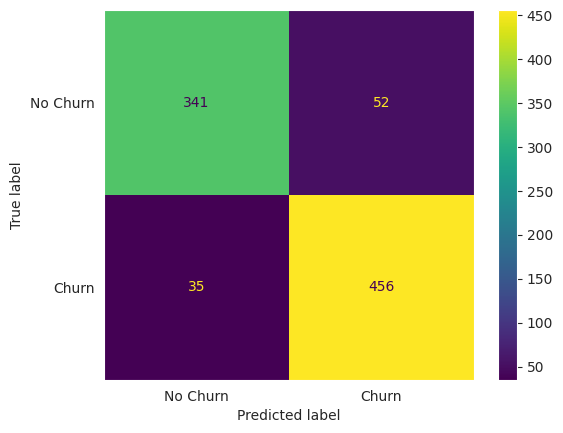

In [124]:
evaluacion_matriz_confusion(y_smote_val, y_previsto_lr_smoteen)

El balanceo de datos con SMOTEENN permite predecir los datos con un índice de 0.93. De igual manera, permite obtener resultados con buena predicción cuando un usuario permanece en la compañía.


### No requieren normalización

#### DecisionTreeClassifier


##### Evaluación con datos normalizados

In [125]:
from sklearn.tree import DecisionTreeClassifier


In [126]:
dt = DecisionTreeClassifier(max_depth=4, random_state=13)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=13)

In [127]:
dt.score(X_val, y_val)

0.8034066713981547

In [128]:
y_previsto_dt = dt.predict(X_val)

              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87      1035
         1.0       0.69      0.48      0.56       374

    accuracy                           0.80      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



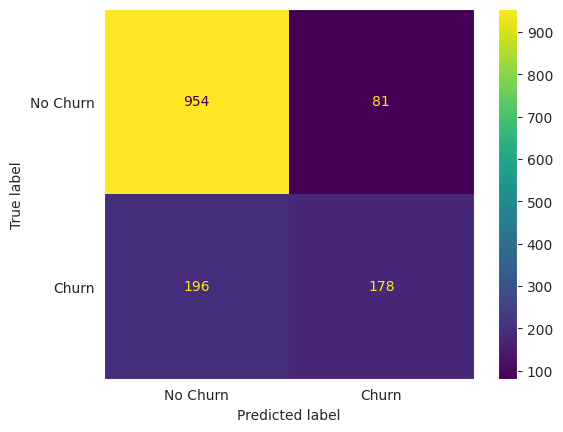

In [129]:
evaluacion_matriz_confusion(y_val, y_previsto_dt)

Nuevamente, el modelo no es capaz de predecir correctamente los valores que interesan a la empresa. Es decir, se tiene una tendencia provocada por la cantidad de clientes que han permanecido en la empresa.

##### Evaluación con datos balanceados

-SMOTE

In [130]:
dt_over = DecisionTreeClassifier(max_depth=4, random_state=13)
dt_over.fit(X_over_train, y_over_train)

DecisionTreeClassifier(max_depth=4, random_state=13)

In [131]:
dt_over.score(X_over_val, y_over_val)

0.7729468599033816

In [132]:
y_previsto_dt_over = dt_over.predict(X_over_val)

              precision    recall  f1-score   support

         0.0       0.83      0.68      0.75       828
         1.0       0.73      0.86      0.79       828

    accuracy                           0.77      1656
   macro avg       0.78      0.77      0.77      1656
weighted avg       0.78      0.77      0.77      1656



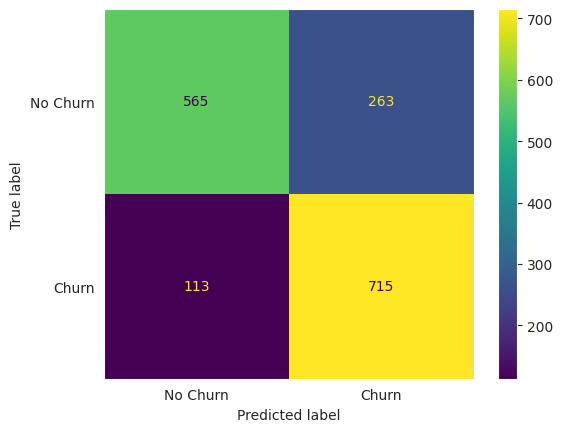

In [133]:
evaluacion_matriz_confusion(y_over_val, y_previsto_dt_over)

El balanceo de los datos permite optimizar el comportamiento del modelo, aunque el balanceo de los datos con f1-score sigue sin presentar un valor optimo para ambos casos.

- SMOTEEENN

In [134]:
dt_smoteeenn = DecisionTreeClassifier(max_depth=4, random_state=13)
dt_smoteeenn.fit(X_smote_train, y_smote_train)

DecisionTreeClassifier(max_depth=4, random_state=13)

In [135]:
dt_smoteeenn.score(X_smote_val, y_smote_val)

0.9219457013574661

In [136]:
y_previsto_dt_smoteeen = dt_smoteeenn.predict(X_smote_val)

              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91       393
         1.0       0.92      0.95      0.93       491

    accuracy                           0.92       884
   macro avg       0.92      0.92      0.92       884
weighted avg       0.92      0.92      0.92       884



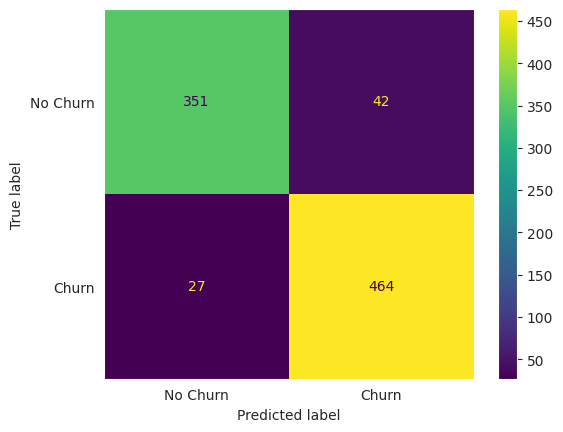

In [137]:
evaluacion_matriz_confusion(y_smote_val, y_previsto_dt_smoteeen)

El modelo presenta resultados óptimos aplicando el balanceo de los valores mediante SMOTEENN, tanto en mi valor de recall (0.95), como de precision y f1-score

#### RandomForestClassifier

##### Evaluación con datos normalizados

In [138]:
from sklearn.ensemble import RandomForestClassifier

In [139]:
rf = RandomForestClassifier(max_depth= 10, random_state=13)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=13)

In [140]:
rf.score(X_val, y_val)

0.8034066713981547

In [141]:
y_previsto_rf = rf.predict(X_val)

              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      1035
         1.0       0.67      0.50      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



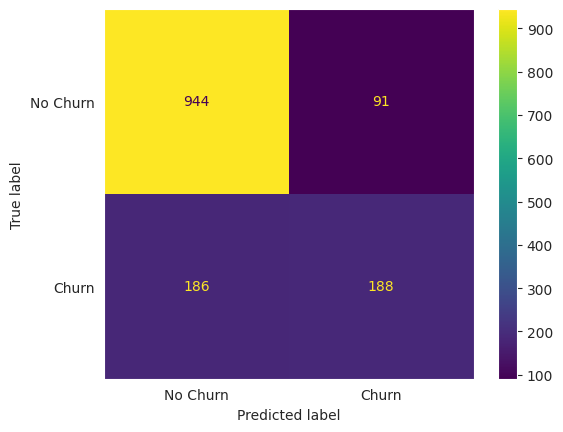

In [142]:
evaluacion_matriz_confusion(y_val, y_previsto_rf)

Con los datos normalizados, nuestro modelo solo es capaz de predecir el 50% de clientes que dejarán la compañia. Seguimos con nuestros datos balanceados.

##### Evaluación con datos balanceados

- SMOTE

In [143]:
rf_over = RandomForestClassifier(max_depth= 10, random_state=13)
rf_over.fit(X_over_train, y_over_train)

RandomForestClassifier(max_depth=10, random_state=13)

In [144]:
rf_over.score(X_over_val, y_over_val)

0.8291062801932367

In [145]:
y_previsto_rf_over = rf_over.predict(X_over_val)

              precision    recall  f1-score   support

         0.0       0.86      0.79      0.82       828
         1.0       0.80      0.87      0.84       828

    accuracy                           0.83      1656
   macro avg       0.83      0.83      0.83      1656
weighted avg       0.83      0.83      0.83      1656



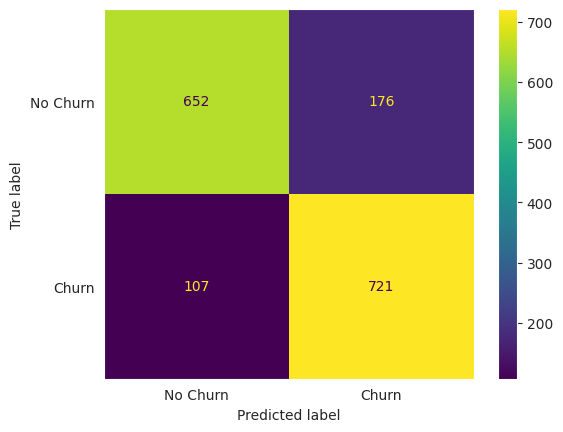

In [146]:
evaluacion_matriz_confusion(y_over_val, y_previsto_rf_over)

El modelo se optimiza. Permite aumentar la detección a partir de datos balanceados. Adicionalmente, tiene valores similares de precisión y valores de f1-score

- SMOTEENN

In [147]:
rf_smoteenn = RandomForestClassifier(max_depth= 10, random_state=13)
rf_smoteenn.fit(X_smote_train, y_smote_train)

RandomForestClassifier(max_depth=10, random_state=13)

In [148]:
rf_smoteenn.score(X_smote_val, y_smote_val)

0.9570135746606335

In [149]:
y_previsto_rf_smoteenn = rf_smoteenn.predict(X_smote_val)

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95       393
         1.0       0.96      0.97      0.96       491

    accuracy                           0.96       884
   macro avg       0.96      0.96      0.96       884
weighted avg       0.96      0.96      0.96       884



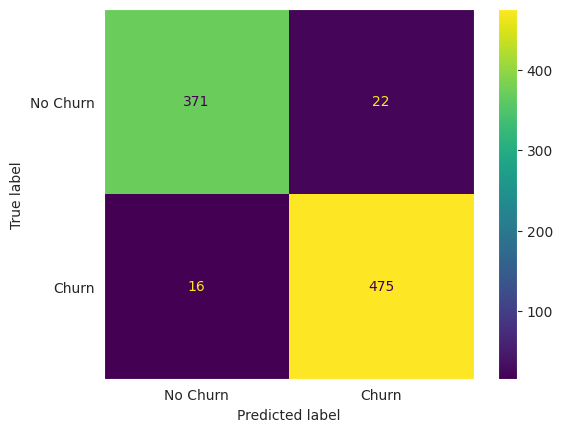

In [150]:
evaluacion_matriz_confusion(y_smote_val, y_previsto_rf_smoteenn)

El modelo presenta un comportamiento idóneo, prediciendo la cancelación de los clientes con un índice de 0.97, adicionalmente, tiene valores óptimos de f1-score y precision.

## Evaluación de los Modelos

Nuestro enfoque se centró en mayor medida en la evaluación del parámetro recall (sensibilidad) puesto que es el detectado como el de mayor interés para el cliente para que cuente con mayor certeza de la detección de clientes que dejearán la compañía o que tienen un riesgo de dejarla.
En general, vimos que los mejores resultados los obtuvimos con los datos balanceados mediante el uso de SMOTEENN, los cuales nos permitieron entrenar en mejor manera nuestros modelos.

### ¿Cuál modelo tuvo el mejor desempeño?

Enfocándonos, no solo en la métrica de sensibilidad, sino tomando en cuenta el índice de deteccción de la presición y el balanceo del modelo (f1-score) detectamos que los siguientes modelos presentan un comportamiento más idóneo.

#### KNN

El KNN nos parece una opción muy atractiva por la alta capcidad de predecir los clientes que abandonarán la compañía. Sin embargo, mantiene una tendencia a generar falsos positivos similar a la de los otros modelos.

              precision    recall  f1-score   support

         0.0       0.97      0.88      0.92       393
         1.0       0.91      0.98      0.94       491

    accuracy                           0.93       884
   macro avg       0.94      0.93      0.93       884
weighted avg       0.94      0.93      0.93       884



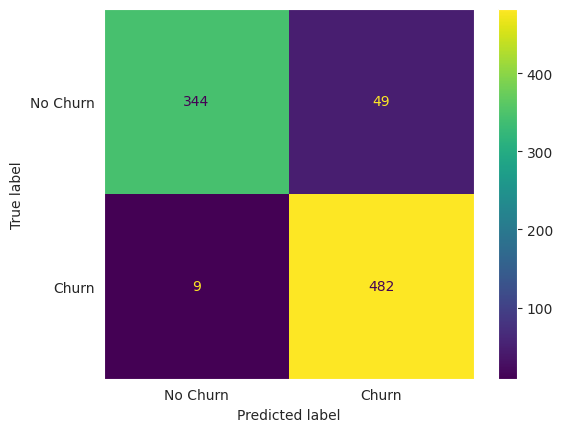

In [151]:
evaluacion_matriz_confusion(y_smote_val, y_previsto_knn_smoteenn)

#### RandomForestClassifier

El RandomForestClassifier no solo destaca en su capacidad de detectar clientes involucrados en el Churn, sino que destaca al respecto de otros modelos en la detección de clientes que permanecen en la compañía, lo cual muestra un equilibrio en ambos niveles de detección.


              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95       393
         1.0       0.96      0.97      0.96       491

    accuracy                           0.96       884
   macro avg       0.96      0.96      0.96       884
weighted avg       0.96      0.96      0.96       884



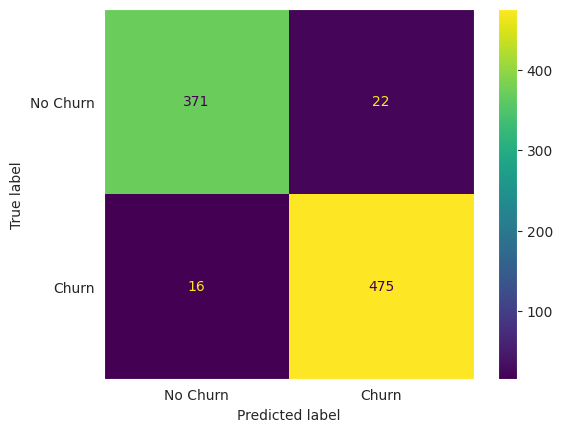

In [152]:
evaluacion_matriz_confusion(y_smote_val, y_previsto_rf_smoteenn)

En este caso no se detectaron modelos con overfitting o underfitting puesto que se controlan durante su creación los valores de max_depth

# 📋 Interpretación y Conclusiones

## Análisis de la Importancia de las Variables

### KNN

In [153]:
from sklearn.inspection import permutation_importance
import numpy as np

In [154]:
result = permutation_importance(kn_smoteenn, X_smote_val, y_smote_val, scoring='recall', n_repeats=10, random_state=13)

In [155]:
knn_importances ={}
for i in result.importances_mean.argsort()[::-1]:
    # print(f"{X_smote_val.columns[i]}: {result.importances_mean[i]:.4f}")
    knn_importances[X_smote_val.columns[i]] = result.importances_mean[i].round(6)

In [156]:
knn_importances

{'remainder__tenure': np.float64(0.015682),
 'remainder__gasto_total_mensual': np.float64(0.013646),
 'remainder__Cuentas_diarias': np.float64(0.011405),
 'remainder__Monthly': np.float64(0.011405),
 'remainder__OnlineSecurity': np.float64(0.007536),
 'remainder__Partner': np.float64(0.007536),
 'remainder__Total': np.float64(0.006721),
 'onehotencoder__PaymentMethod_Electronic check': np.float64(0.004888),
 'onehotencoder__PaymentMethod_Credit card (automatic)': np.float64(0.004888),
 'onehotencoder__gender_Male': np.float64(0.004481),
 'onehotencoder__gender_Female': np.float64(0.004481),
 'remainder__MultipleLines': np.float64(0.004277),
 'onehotencoder__Contract_Two year': np.float64(0.003666),
 'remainder__Dependents': np.float64(0.003462),
 'onehotencoder__Contract_One year': np.float64(0.003259),
 'remainder__StreamingMovies': np.float64(0.003055),
 'remainder__DeviceProtection': np.float64(0.003055),
 'remainder__PaperlessBilling': np.float64(0.002851),
 'remainder__TechSupport

In [157]:
knn_importances_df = pd.DataFrame.from_dict(knn_importances, orient='index', columns=['Importancia'])

In [158]:
knn_importances_df = knn_importances_df.style.format({'Importancia': '{:.6f}'.format})

In [159]:
knn_importances_df

,Importancia
remainder__tenure,0.015682
remainder__gasto_total_mensual,0.013646
remainder__Cuentas_diarias,0.011405
remainder__Monthly,0.011405
remainder__OnlineSecurity,0.007536
remainder__Partner,0.007536
remainder__Total,0.006721
onehotencoder__PaymentMethod_Electronic check,0.004888
onehotencoder__PaymentMethod_Credit card (automatic),0.004888
onehotencoder__gender_Male,0.004481


El sistema muestra una diferencia entre el valor mayor de 0.01568, de la variable remainder__tenure a -0.000815. A pesar de contar con un par de variables con valor negativo (onehotencoder__InternetService_Fiber optic y remainder__SeniorCitizen), estas presentan un valor cercano a cero, por lo que se puede indicar que todas las variables contribuyen al comportamiento del modelo

### RandomForestClassifier

In [160]:
importances = rf_smoteenn.feature_importances_
feature_imp_rf = pd.DataFrame({'Features': X_over_train.columns, 'Importances': (importances * 100).round(2)}).sort_values('Importances', ascending= False).reset_index(drop=True)
feature_imp_rf

,Features,Importances
0,onehotencoder__Contract_Month-to-month,20.94
1,onehotencoder__InternetService_Fiber optic,9.38
2,remainder__tenure,9.11
3,onehotencoder__Contract_Two year,7.60
4,remainder__Cuentas_diarias,6.12
5,remainder__gasto_total_mensual,5.72
6,remainder__Monthly,5.62
7,remainder__Total,5.40
8,onehotencoder__PaymentMethod_Electronic check,4.60
9,onehotencoder__InternetService_No,4.13


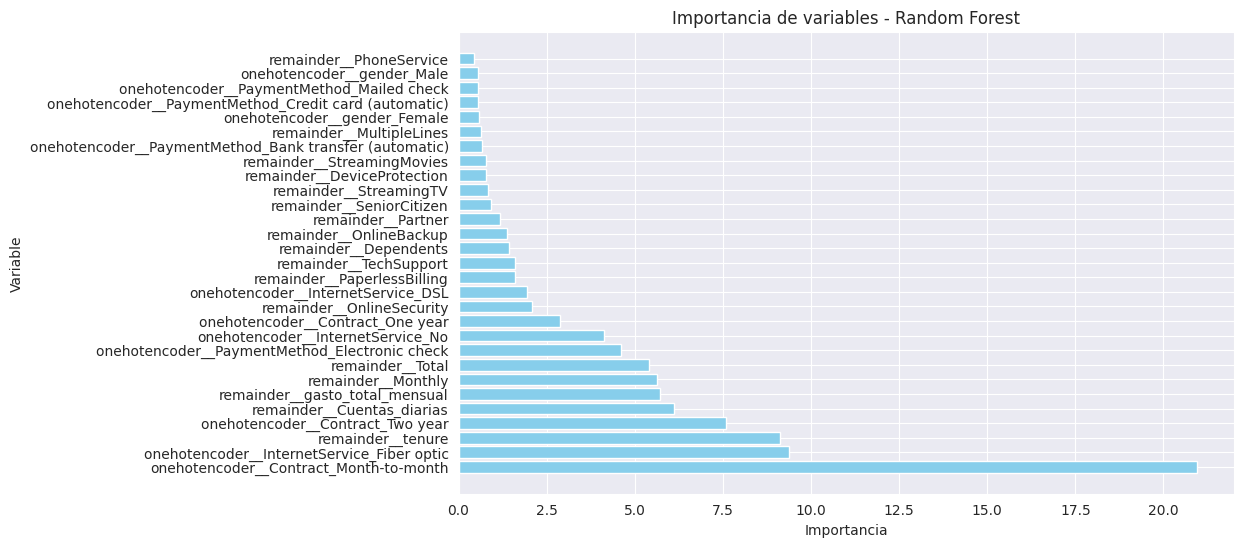

In [161]:
plt.figure(figsize=(10, 6))
plt.barh(feature_imp_rf['Features'], feature_imp_rf['Importances'], color='skyblue')
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.title("Importancia de variables - Random Forest")
plt.show()

Se encuentra que en el caso de este modelo se tiene una relevancia alta para el caso de la variable onehotencoder__Contract_Month-to-month, la cual presenta un valor mayor al 20%.
Por otro lado, 10 del total de las variables presentan un valor de importancia menor del 1%. Como ejemplo práctico, se correrá un ejercicio para evaluar las variables con valores mayores al 1% únicamente para evaluar si su descarte no afecta el comportamiento del modelo sobre el parámetro recall.

In [162]:
variables_relevantes = feature_imp_rf[feature_imp_rf['Importances'] >= 1]['Features'].tolist()
len(variables_relevantes)

18

In [163]:
X_smote_train_reduced = X_smote_train[variables_relevantes]
X_smote_val_reduced = X_smote_val[variables_relevantes]

In [164]:
rf_smoteenn_reduced = RandomForestClassifier(max_depth= 10, random_state=13)
rf_smoteenn.fit(X_smote_train_reduced, y_smote_train)

RandomForestClassifier(max_depth=10, random_state=13)

In [165]:
y_previsto_rf_smoteenn_reduced = rf_smoteenn.predict(X_smote_val_reduced)

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94       393
         1.0       0.95      0.96      0.95       491

    accuracy                           0.95       884
   macro avg       0.95      0.95      0.95       884
weighted avg       0.95      0.95      0.95       884



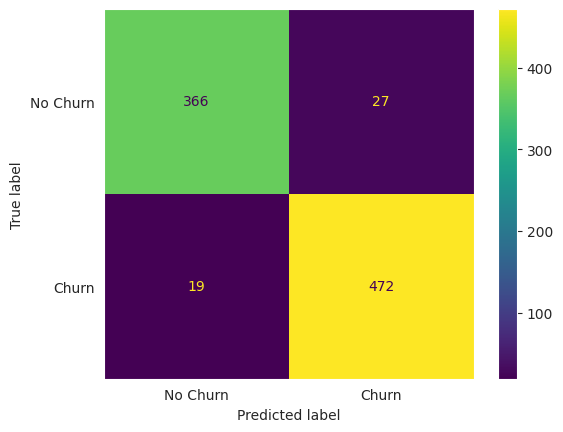

In [166]:
evaluacion_matriz_confusion(y_smote_val, y_previsto_rf_smoteenn_reduced)

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95       393
         1.0       0.96      0.97      0.96       491

    accuracy                           0.96       884
   macro avg       0.96      0.96      0.96       884
weighted avg       0.96      0.96      0.96       884



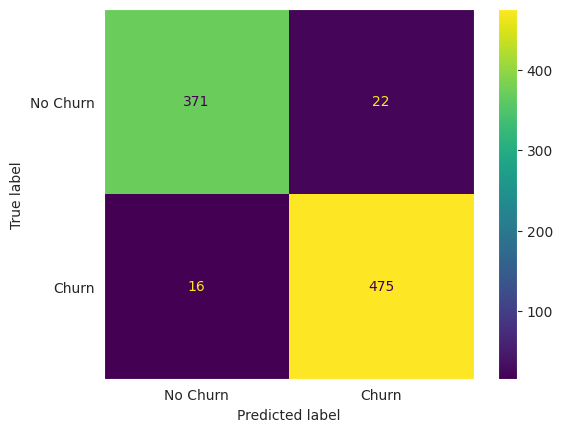

In [167]:
#Evaluación original
evaluacion_matriz_confusion(y_smote_val, y_previsto_rf_smoteenn)

In [168]:
feature_imp_rf[feature_imp_rf['Importances'] <= 1]['Importances'].sum()

np.float64(7.3)

Se opta por mantener todas las variables al no presentar diferencia significativa entre el modelo original como el modelo reducido. A la vez de descartar

## Optimización de modelos


### KNN

In [169]:
from sklearn.model_selection import GridSearchCV

In [170]:
param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]
}

In [171]:
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='recall')
knn_grid.fit(X_smote_train, y_smote_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 31), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [172]:
knn_grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}

In [173]:
knn_grid.best_score_

np.float64(0.9884353741496599)

In [174]:
kn_best = KNeighborsClassifier(metric='euclidean', n_neighbors= 1, p= 1, weights='uniform')

### RandomForestClassifier

In [175]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [176]:
rf = RandomForestClassifier(random_state=13)
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=2
)

In [177]:
grid_search_rf.fit(X_smote_train, y_smote_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=13), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='recall', verbose=2)

In [178]:
grid_search_rf.best_params_

{'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [179]:
grid_search_rf.best_score_

np.float64(0.9564625850340136)

In [180]:
rf_best = RandomForestClassifier(max_depth=15, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=300 ,random_state=13)

## Validación Cruzada

In [181]:
from sklearn.model_selection import KFold, cross_validate

### KNN

In [182]:
X_smote_enn, X_smote_test, y_smote_enn, y_smote_test = train_test_split(X_smote_enn, y_smote_enn, test_size=0.3, stratify=y_smote_enn, random_state=13)

In [183]:
kn_best = KNeighborsClassifier(metric='euclidean', n_neighbors= 1, p= 1, weights='uniform')
kf_knn = KFold(n_splits=5, shuffle=True, random_state=13)
cv_resultados_knn = cross_validate(kn_best,X_smote_enn,y_smote_enn, cv=kf_knn, scoring='recall')
cv_resultados_knn

{'fit_time': array([0.00519776, 0.0042634 , 0.00411129, 0.00443792, 0.00432682]),
 'score_time': array([0.01685905, 0.01246214, 0.0129993 , 0.0124619 , 0.01265574]),
 'test_score': array([0.96240602, 0.98239437, 0.98905109, 0.98586572, 0.99622642])}

In [184]:
def intervalo_confianza(resultados):
  promedio = resultados['test_score'].mean()
  desvio_std = resultados['test_score'].std()
  return print(f'El intervalo de confianza es de [{promedio - 2*desvio_std} a {min(promedio + 2*desvio_std, 1)}]')

In [185]:
intervalo_confianza(cv_resultados_knn)

El intervalo de confianza es de [0.9604895229809062 a 1]


### RandomForestClassifier

In [186]:
rf_best = RandomForestClassifier(max_depth=15, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=300 ,random_state=13)
kf_rf = KFold(n_splits=5, shuffle=True, random_state=13)
cv_resultados_rf = cross_validate(rf_best,X_smote_enn,y_smote_enn, cv=kf_rf, scoring='recall')
cv_resultados_rf

{'fit_time': array([1.05454111, 1.46559834, 1.51566887, 1.01988149, 1.0402627 ]),
 'score_time': array([0.03660274, 0.05904245, 0.03783369, 0.0371356 , 0.03706479]),
 'test_score': array([0.95864662, 0.95774648, 0.94525547, 0.93992933, 0.96226415])}

In [187]:
intervalo_confianza(cv_resultados_rf)

El intervalo de confianza es de [0.9355454069175086 a 0.9699914128554723]


# Optimización de los modelos.

Se hace una evaluación

## KNN

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=13)

### Datos balanceados

In [192]:
smote_enn = SMOTEENN(random_state=42)

X_smote_enn, y_smote_enn = smote_enn.fit_resample(X_train, y_train)

In [193]:
kn_best = KNeighborsClassifier(metric='euclidean', n_neighbors= 1, p= 1, weights='uniform')
kn_best.fit(X_smote_enn, y_smote_enn)

KNeighborsClassifier(metric='euclidean', n_neighbors=1, p=1)

In [194]:
y_previsto_kn_best = kn_best.predict(X_smote_test)

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95       472
         1.0       0.96      0.96      0.96       589

    accuracy                           0.96      1061
   macro avg       0.96      0.95      0.96      1061
weighted avg       0.96      0.96      0.96      1061



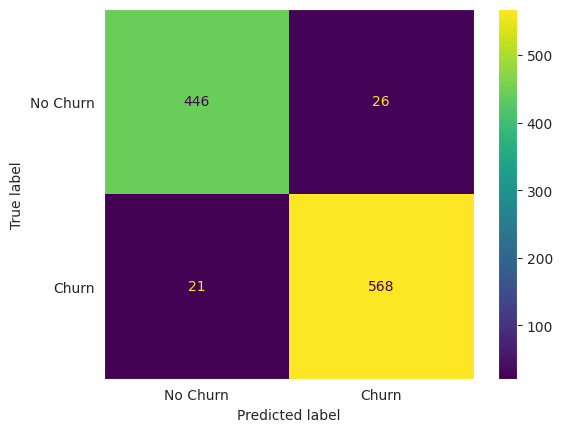

In [ ]:
evaluacion_matriz_confusion(y_smote_test, y_previsto_kn_best)

El modelo sigue manteniendo un comportamiento idóneo

### Evaluación con Datos no balanceados

In [195]:
kn_best_real = KNeighborsClassifier(metric='euclidean', n_neighbors= 1, p= 1, weights='uniform')

In [196]:
kn_best_real.fit(X_smote_enn, y_smote_enn)

KNeighborsClassifier(metric='euclidean', n_neighbors=1, p=1)

In [197]:
y_previsto_kn_best_desbalanceado = kn_best_real.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.90      0.62      0.73       828
         1.0       0.43      0.81      0.56       299

    accuracy                           0.67      1127
   macro avg       0.67      0.71      0.65      1127
weighted avg       0.78      0.67      0.69      1127



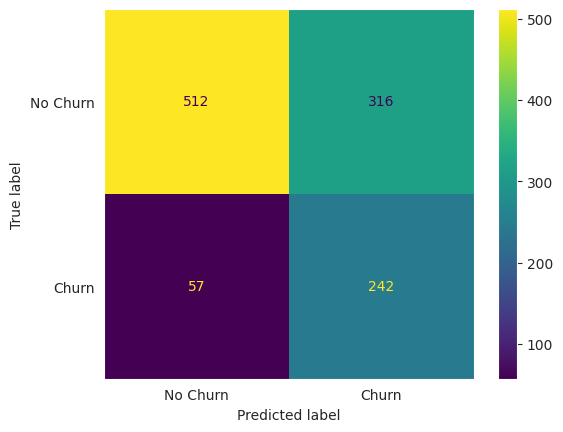

In [198]:
evaluacion_matriz_confusion(y_test, y_previsto_kn_best_desbalanceado)

El desbalanceo de los datos se ve reflejado en la métrica f1-score. Sin embargo, el sistema sigue presentando un valor aceptable de recall, lo que permitirá a la empresa detectar hasta el 81 porciento de los clientes que pretenden abandonar la compañía.

## RandomForestClassifier

In [199]:
rf_best = RandomForestClassifier(max_depth=15, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=300 ,random_state=13)
rf_best.fit(X_smote_enn, y_smote_enn)

RandomForestClassifier(max_depth=15, n_estimators=300, random_state=13)

In [200]:
y_previsto_rf_best = rf_best.predict(X_smote_test)

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94       472
         1.0       0.96      0.94      0.95       589

    accuracy                           0.95      1061
   macro avg       0.94      0.95      0.94      1061
weighted avg       0.95      0.95      0.95      1061



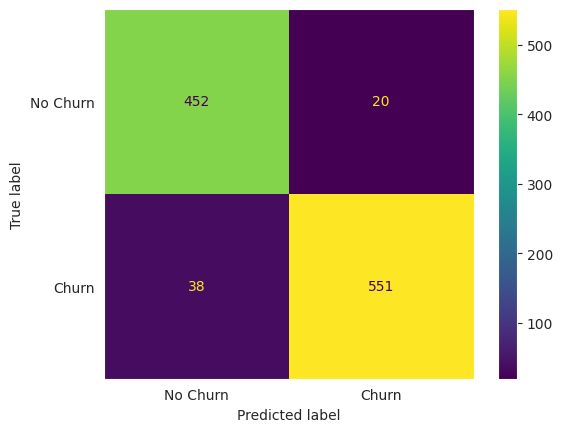

In [201]:
evaluacion_matriz_confusion(y_smote_test, y_previsto_rf_best)

### Evaluación con Datos no balanceados

In [202]:
rf_best_real = RandomForestClassifier(max_depth=15, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=300 ,random_state=13)
rf_best_real.fit(X_smote_enn, y_smote_enn)

RandomForestClassifier(max_depth=15, n_estimators=300, random_state=13)

In [203]:
y_previsto_rf_best_desbalanceado = rf_best_real.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.90      0.70      0.79       828
         1.0       0.48      0.77      0.59       299

    accuracy                           0.72      1127
   macro avg       0.69      0.74      0.69      1127
weighted avg       0.79      0.72      0.73      1127



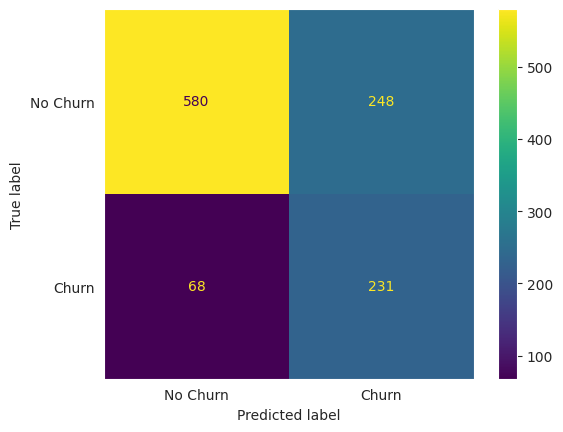

In [204]:
evaluacion_matriz_confusion(y_test, y_previsto_rf_best_desbalanceado)

El modelo presenta un recall ligéramente menor (cercano al 77%) pero a la vez presenta una mejor precisión que el modelo KNN, lo que nos permite contar con un f1 mayor que el modelo anterior.

## Extracción del modelo

In [206]:
import pickle

In [207]:
try:
  with open('knn.pkl', 'wb') as file:
    pickle.dump(kn_best_real, file)

  print('modelo serializaco con éxito')
except Exception as e:
  print('Se presentó error al almacenar modelo:',str(e))

modelo serializaco con éxito


In [208]:
try:
  with open('rf.pkl', 'wb') as file:
    pickle.dump(rf_best_real, file)

  print('modelo serializaco con éxito')
except Exception as e:
  print('Se presentó error al almacenar modelo:',str(e))

modelo serializaco con éxito
